## Progetto FAD


### Analisi sulla salute dei feti




Le Nazioni Unite si aspettano che entro il 2030 i paesi pongano fine alle morti prevenibili di neonati e bambini sotto i 5 anni di età, con tutti i paesi che mirano a ridurre la mortalità sotto i 5 anni almeno a 25 per 1.000 nati vivi.
Parallela alla nozione di mortalità infantile è ovviamente la mortalità materna, che rappresenta 295000 decessi durante e dopo la gravidanza e il parto (a partire dal 2017). La stragrande maggioranza di queste morti (94%) si è verificata in contesti con poche risorse e la maggior parte avrebbe potuto essere prevenuta.
Alla luce di quanto sopra menzionato, i [cardiotocogrammi (CTG)](https://en.wikipedia.org/wiki/Cardiotocography) sono un'opzione semplice ed economica per valutare la salute fetale, consentendo agli operatori sanitari di agire per prevenire la mortalità infantile e materna. L'apparecchiatura stessa funziona inviando impulsi ecografici e leggendo la sua risposta, facendo così luce sulla frequenza cardiaca fetale (FHR), i movimenti fetali, le contrazioni uterine e altro ancora.

Lo scopo di quest'analisi è di analizzare un dataset contenente dei record sulla salute dei feti. 
La domanda che guiderà quest'analisi è "Riusciamo a classificare la saluti dei feti con le informazioni fornite dalla CTG?", inoltre si cercheranno  possibili relazioni tra gli attributi del dataset e lo stato del feto.


Il dataset è stato preso da *Kaggle*,  [fetal_health](https://www.kaggle.com/andrewmvd/fetal-health-classification).


## Raccolta Dati

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##importiamo il dataset 
df=pd.read_csv('fetal_health.csv')
df.head(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Numerosità del campione

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Il dataset presenta <b>2126</b> record, <b>22</b> attributi di cui **1** attributo ne indica la classe.

Gli attributi provengono da delle misurazioni effettuate sul feto tipo:
<ul>
    <li><b>baseline value</b>: indica il battito cardiaco</li>
    <li><b>accelerations</b>: indica il numero di accelerazioni (un incremento del battito cardiaco particolarmente evidente) </li>
    <li><b>uterine_contractions</b>: indica il numero di contrazioni</li>
    <li><b>fetal_health</b>: indica la salute del feto (Normale,Sospetto,Patologico)</li>
</ul>    
I nostri attributi sono tutti di tipo  <i>float</i> anche l'attributo target (fetal_health), che è codificato in questo modo:

<ul>
<li>Normale -> 1</li>
<li>Sospetto -> 2</li>
<li>Patologico ->3</li>
</ul>

## Sommario statistico

Vediamo qualche statistica iniziale sul dataset.

In [4]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

Vediamo come si distribuiscono i record per le varie classi

Text(0.5, 1.0, 'Numerosità classi')

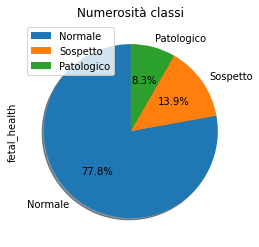

In [5]:
ax=df.groupby(['fetal_health'])['fetal_health'].count().plot(kind='pie',labels=['Normale','Sospetto','Patologico'], subplots=True, shadow = True,startangle=90, autopct='%1.1f%%')
plt.legend()
plt.title('Numerosità classi')


Notiamo subito che il dataset è palesemente sbilanciato

## Analisi Statistica

Cominciamo vedendo gli istogrammi del campione per le varie colonne, differenziandolo per le 3 classi.

E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\Conda\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
E:\C

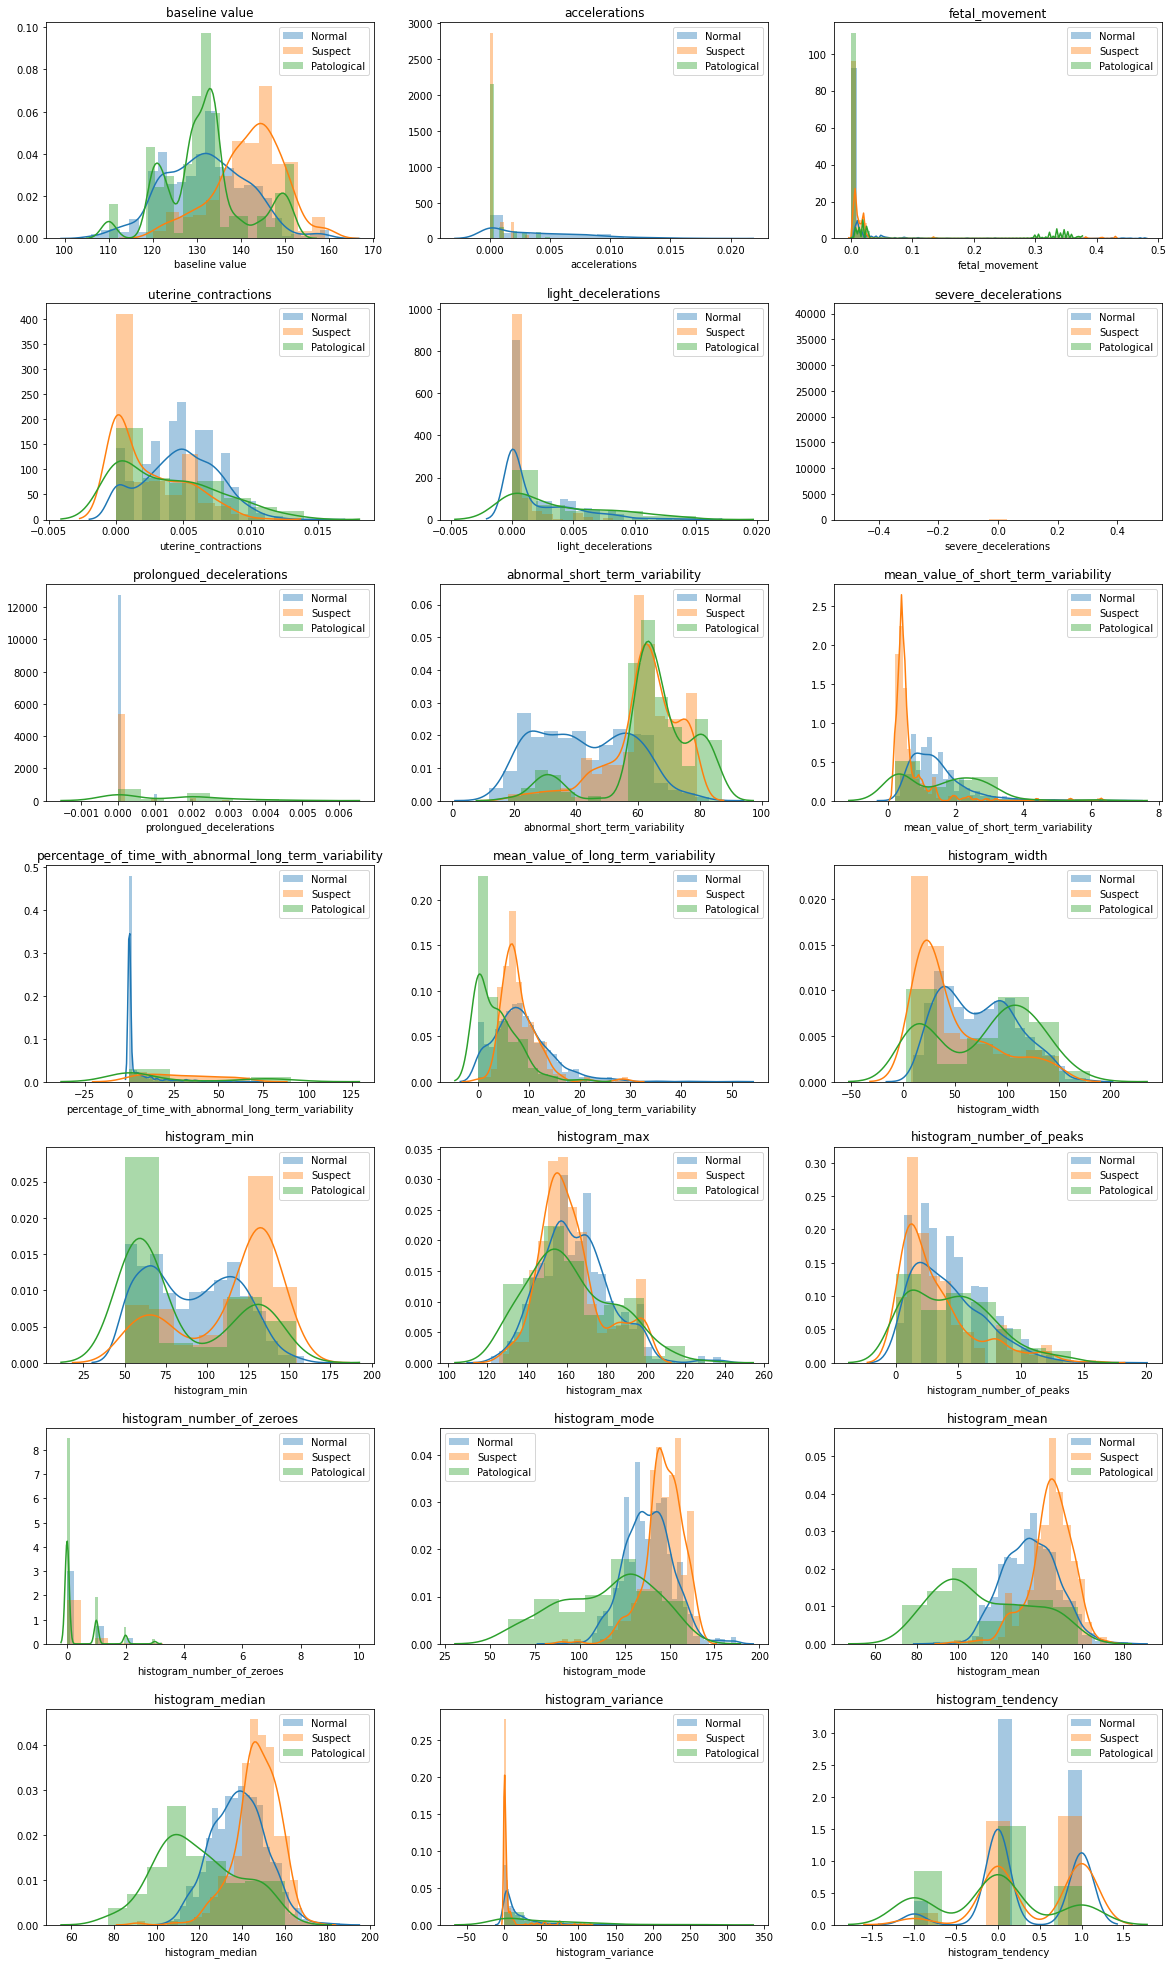

In [6]:
#DATA HISTOGRAM/DENSITY
def histogram_info(df):
    fig,axes=plt.subplots(7,3,figsize=(20,35))
    plt.subplots_adjust(hspace=0.3)

    for col,ax_ in zip(df.columns,axes.flatten()):
        sns.distplot(df[df['fetal_health']==1][col],ax=ax_,label='Normal')
        sns.distplot(df[df['fetal_health']==2][col],ax=ax_,label='Suspect')
        sns.distplot(df[df['fetal_health']==3][col],ax=ax_,label='Patological')
        
        #sns.distplot(df[col],ax=ax_) ## no classes 
        ax_.legend()
        ax_.set_title(col)
        

histogram_info(df)

Notiamo che in alcuni attributi ci sono delle notevoli differenze come *accelerations*,*fetal_movement*,*prolongued_decelerations*,*uterine_contractions*, *histogram_variance*,*mean_value_short_variability*, che presentano dei picchi evidenti rispetto alle altre classi.

Da notare anche l'attributo *severe_deceleration* non si riesce a visualizzare correttamente perchè i valori sono molto bassi.

E:\Conda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


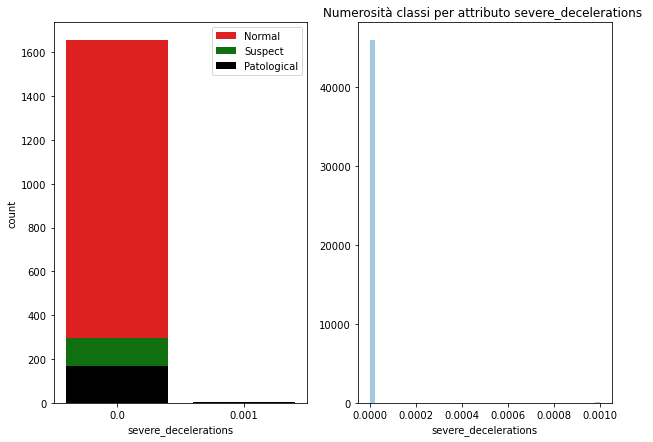

In [7]:
fig,axes=plt.subplots(1,2,figsize=(10,7))
sns.countplot(df[df['fetal_health']==1]['severe_decelerations'],label='Normal',color='red',ax=axes[0])
sns.countplot(df[df['fetal_health']==2]['severe_decelerations'],label='Suspect',color='green',ax=axes[0])
sns.countplot((df[df['fetal_health']==3]['severe_decelerations']),label='Patological',color='black',ax=axes[0])
axes[0].legend()
plt.title('Numerosità classi per attributo severe_decelerations ')

sns.distplot(df['severe_decelerations'],ax=axes[1])

Le classi *Patological* sono le uniche ad avere valori diversi per l'attributo *severe_decelerations* seppur in minima parte.

Potrebbero essere outlier da eliminare o da tenere fortemente in considerazione.

## Boxplot

Continuiamo ad esplorare i dataset con i boxplot, per avere una visione sulla variabilità dei dati.


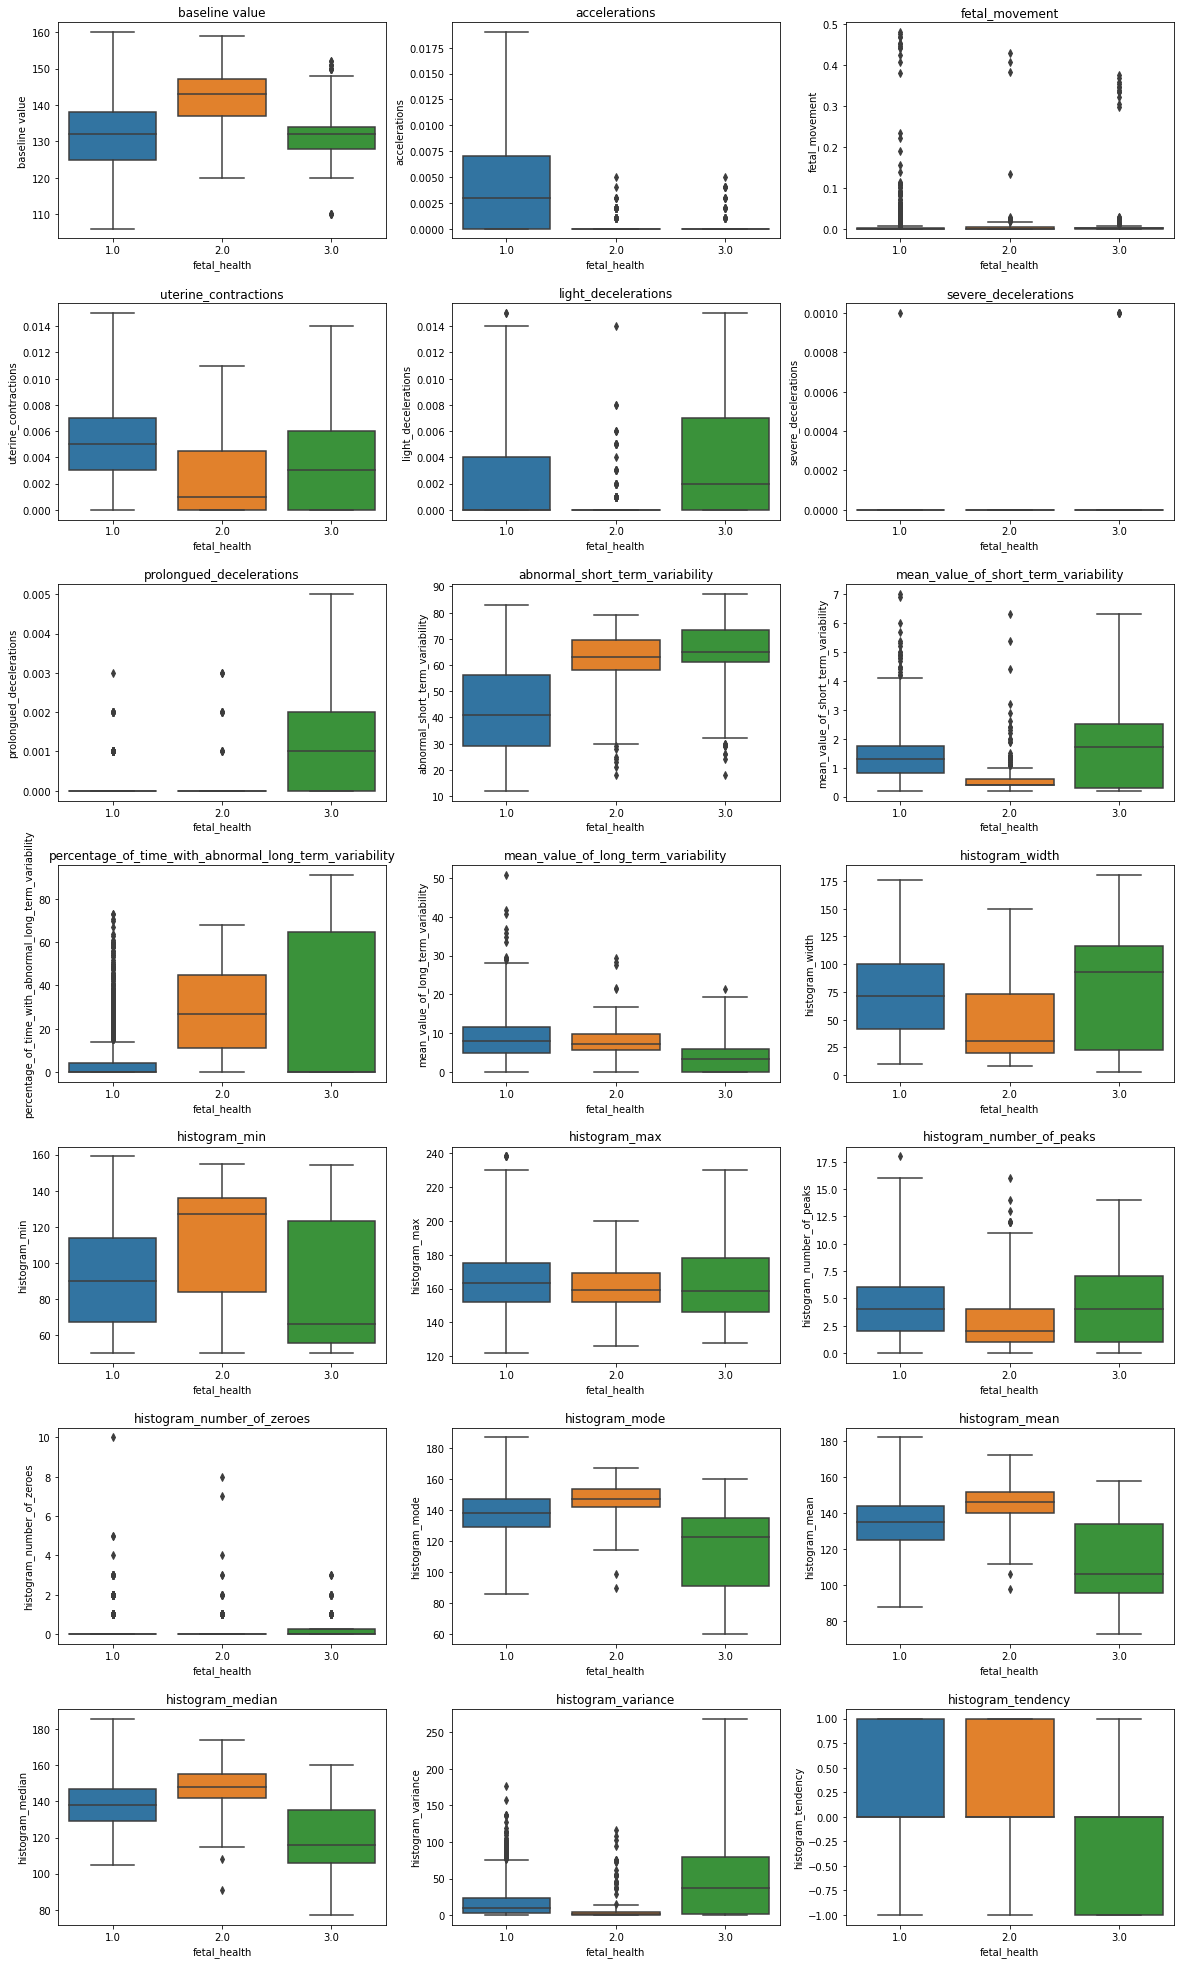

In [8]:
def boxplot_info(df):
    fig,axes=plt.subplots(7,3,figsize=(20,35))
    plt.subplots_adjust(hspace=0.3)
    whis=2.5
    for col,ax_ in zip(df.columns,axes.flatten()):
        sns.boxplot(y=df[col],x=df['fetal_health'],ax=ax_,whis=whis)
        ax_.set_title(col)


boxplot_info(df)

I boxplot mostrano dove si trova la metà centrale dei dati, i valori fuori dai "baffi" in genere vengono identificati come outliers.

Notiamo che *accelerations*, ha una bassisima variabilità per le classi *Suspect* e *Patological*.
Notiamo anche che *prolongued_decelerations*, ha una bassisima variabilità per le classi *Suspect* e *Normal*.

Gli altri attributi mostrano che in genere le classi *Patological* e *Normal* hanno valori leggermente diversi.


## Violinplot
La dispersione/concentrazione di queste colonne si può vedere con il violinplot.

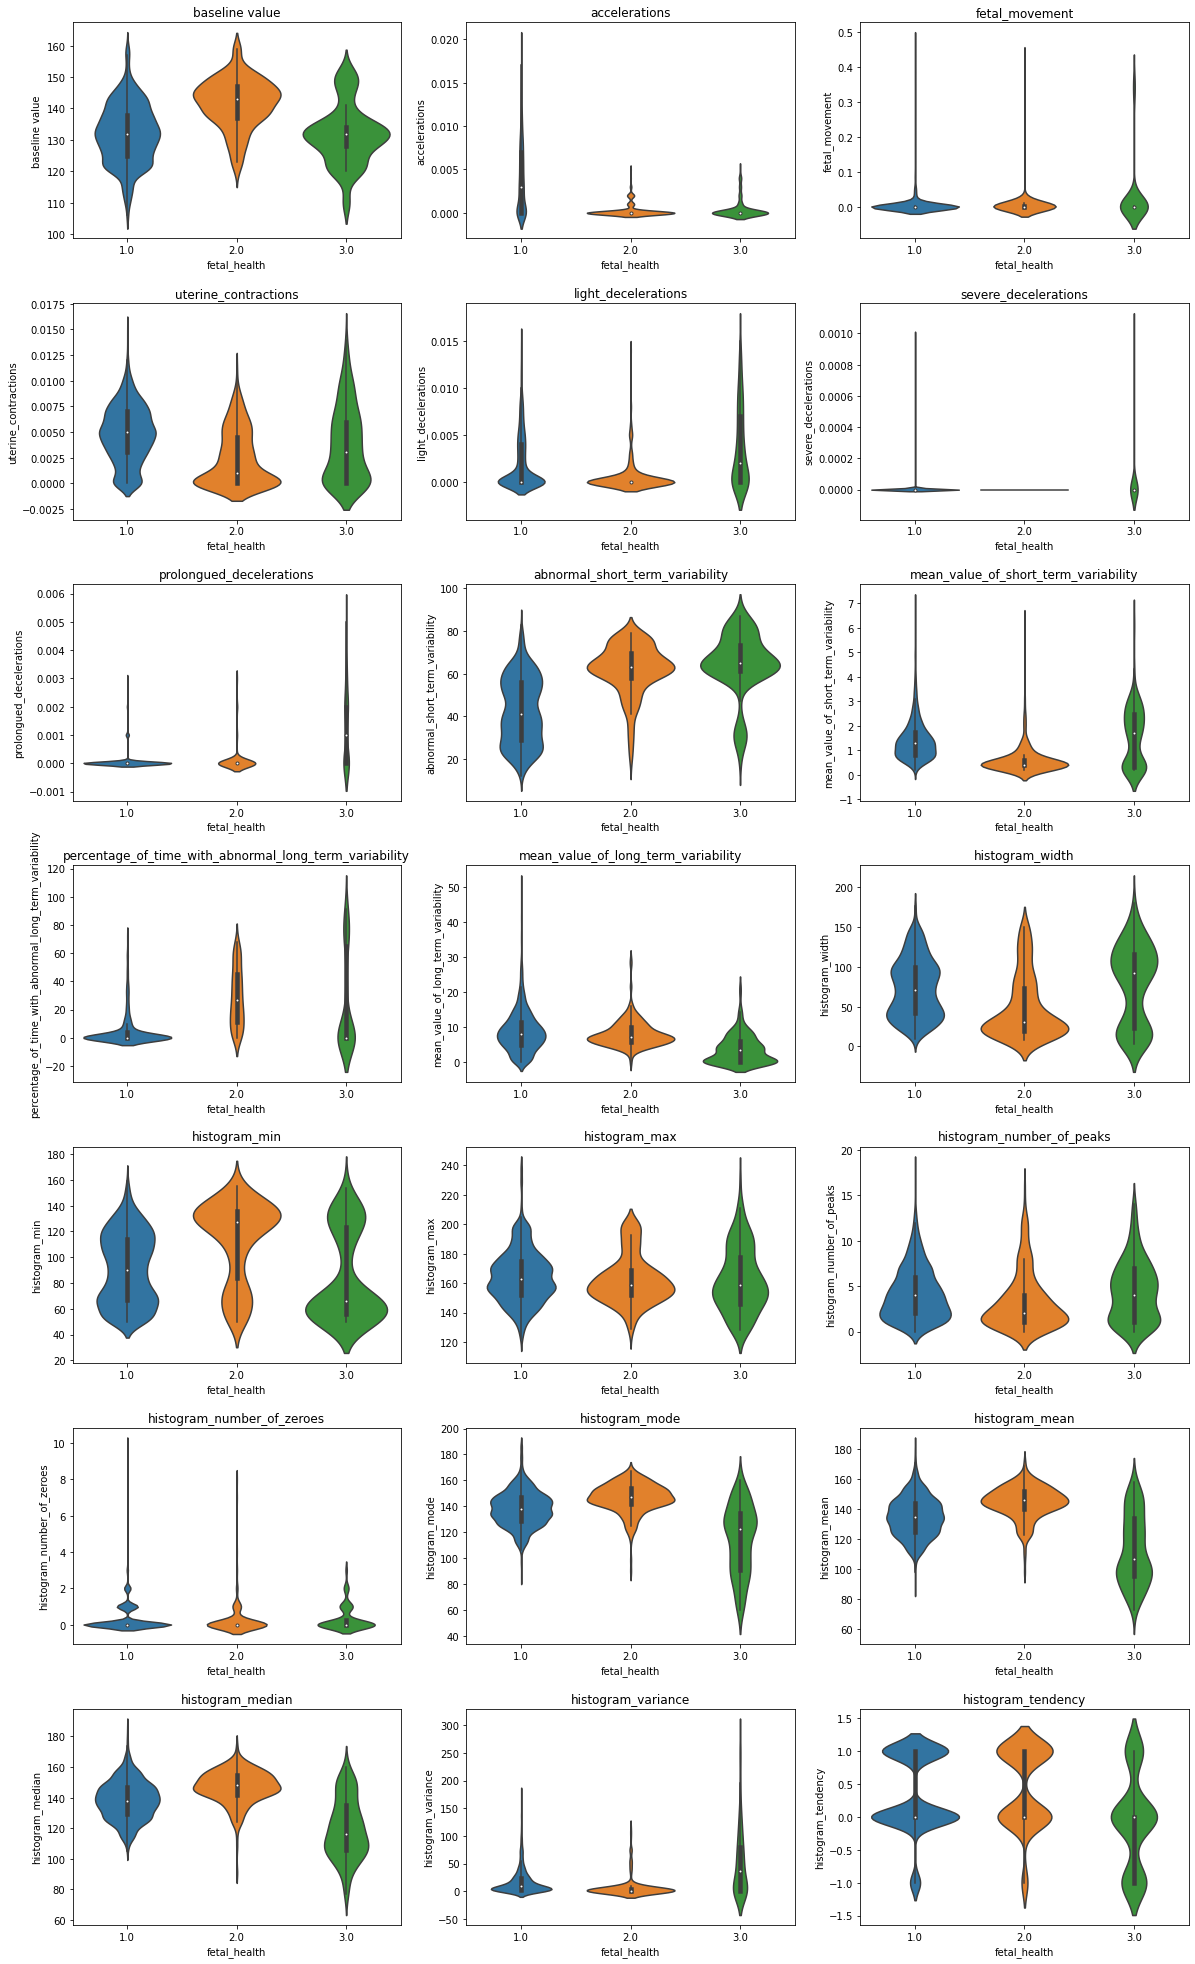

In [9]:
def violinplot_info(df):
    fig,axes=plt.subplots(7,3,figsize=(20,35))
    plt.subplots_adjust(hspace=0.3)
    cols_=df.columns # ['baseline value','accelerations','prolongued_decelerations'] #df.columns
    for col,ax_ in zip(cols_,axes.flatten()):
        sns.violinplot(y=df[col],x=df['fetal_health'],ax=ax_)
        ax_.set_title(col)
        
violinplot_info(df)

## Data Cleaning


Un passo importante per la nostra analisi dati è quello di *data cleaning*, in cui dovremo gestire i possibili *NaN*,*Null* e *outliers*, valori duplicati.

In [10]:
#NO DATI NULLI, OK
print("Quanti record hanno un valore nullo?",df.isnull().sum(0).sum(0))
#NO DATI NAN, OK
print("Quanti record hanno un valore NaN?",df.isna().sum(0).sum(0))
#24 RECORD DUPLICATI, LI TOGLIAMO 
print("Quanti record sono duplicati?",len(df[df.duplicated(keep=False)]))

df=df[~df.duplicated(keep=False)].reset_index(drop=True)
#print(df.shape)

Quanti record hanno un valore nullo? 0
Quanti record hanno un valore NaN? 0
Quanti record sono duplicati? 24


Gestiamo gli outliers con l'algoritmo *multiedit*.

In [11]:
#DATA CLEANING OUTLIERS/MULTIEDIT 

from sklearn.neighbors import KNeighborsClassifier

def multiedit(data, target, s=5, T=1):
    #L'algoritmo ha due parametri: s e T. Noi scegliamo
    #s=5 (5 split) e T=2 (termina dopo tre iterazione senza errori di classificazione)
    all_indices = np.array(range(len(data)))
    finished = False
    iterations_since_last_change = 0
    knn = KNeighborsClassifier(n_neighbors=1)
    while not finished:
        edited = False
        split_indices = np.array_split(np.random.permutation(all_indices),s)
        mark_for_removal = []

        for i in range(s):
            #calcoliamo gli indici degli elementi di training e test
            j = (i+1)%s
            idx_test = split_indices[i]
            idx_train = split_indices[j]
            
            #alleniamo il classificatore 1-NN usando gli elementi di training
            knn.fit(data.loc[idx_train],target.loc[idx_train])
            
            #classifichiamo gli elementi di test
            predictions = knn.predict(data.loc[idx_test])
            
            #contrassegnamo per la rimozione tutti gli elementi che sono stati classificati male
            mark_for_removal.extend(idx_test[np.where(predictions!=target[idx_test])])
            
            #se abbiamo classificato male qualche campione, impostiamo edited a True
            if all(predictions!=target[idx_test]):
                edited = True
                
        #rimuoviamo gli indici che avevamo contrassegnato per la rimozione
        all_indices = np.setdiff1d(all_indices, mark_for_removal)
        
        #se non abbiamo modificato il set
        if not edited:
            #incrementiamo il numero di iterazioni dall'ultimo cambiamento
            iterations_since_last_change+=1
            
        #condizione di terminazione
        if iterations_since_last_change>=T:
            finished=True
    
    #restituiamo il nuovo set
    return data.loc[all_indices], target.loc[all_indices]


##OUTLIERS BOXPLOT / POCO EFFICACE/PRESTAZIONI SUI CLASSIFICATORI BASSE /SBILANCIATO ANCOR DI PIù
def remove_outliers(df):
    k=5 ## DIMENSIONE K
    df_nuovo=df.copy()
    for col in ['fetal_movement','uterine_contractions','accelerations']:
        #print(col)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1    #IQR interquartile range. 
        filter1_ = (df[col] >= Q1 - k * IQR) & (df[col] <= Q3 + k *IQR)
        df_nuovo=df_nuovo.loc[filter1_]
    return df_nuovo.drop(['fetal_health'],axis=1),df_nuovo['fetal_health']



df_nuovo,target=multiedit(df.drop(['fetal_health'],axis=1),df['fetal_health'])
df_nuovo['fetal_health']=target 
print(df_nuovo.shape,target.shape)

#print("Quanti record sono duplicati?",(df_nuovo[df_nuovo.duplicated(keep=False)]))

(1838, 22) (1838,)


## Skewness e Kurtosis

La *Kurtosis* è un indice che indica come fenomeno si distribuisce  attorno alla propria media, sostanzialmente ci sono 3 casi:
<ul>
    <li>Leptocurtica, molto concentrata intorno alla media</li>
    <li>Mesocurtica</li>
    <li>Platicurtica, poco concentrata intorno alla media </li>
    
</ul>

La *Skewness* è un indice che invece misura l'asimmetria della distribuzione attorno alla distribuzione, 2 casi:
<ul>
    <li>Positiva (asimmetria a sinistra)</li>
    <li>Negativa (asimmetria a destra)</li>
</ul>

In [12]:
info=df_nuovo.describe().T
skew=df_nuovo.skew()
kurtosis=df_nuovo.kurtosis()
info['skew']=skew
info['kurtosis']=kurtosis

## 8 Soglia?
info.style.applymap(lambda x: "background-color: black" if x<=8 else "background-color: green",subset=['kurtosis','skew'])




Notiamo che *fetal_movement*,*severe_decelerations* hanno un valore di kurtosis  molto alto e skew positiva (asimmetria a sinistra, si poteva intuire dagli istogrammi visti in precedenza).
Per quanto riguarda la skewness la *severe_decelerations* ha un valori positivo (asim a sinistra).


Vediamo qualche informazione sul campione. 

In particolare ci focalizziamo sulle colonne che sono risultate più interessanti hanno evidenti palesi diversità

Vediamo come si comportano i valori medi di tali attributi per le ciascuna classe.

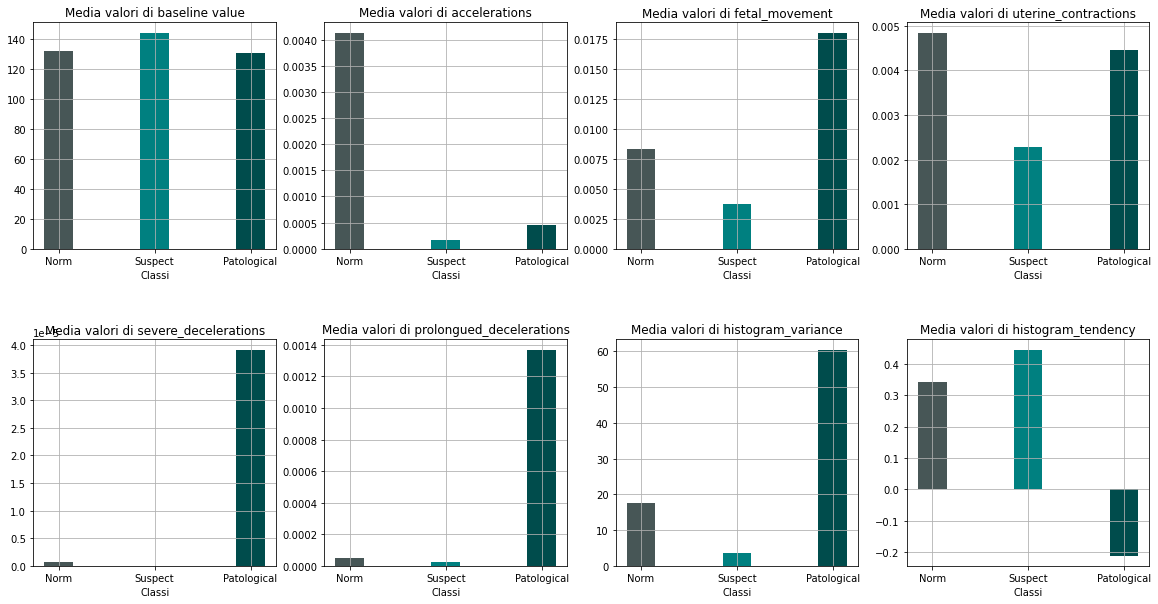

In [13]:
def plotbar_info(df_nuovo):
    fig,axes=plt.subplots(2,4,figsize=(20,10))
    plt.subplots_adjust(hspace=0.4)
    df_groupby=df_nuovo.groupby('fetal_health')
    
    #histogram_min tolto 
    for col,ax_ in zip(['baseline value','accelerations','fetal_movement','uterine_contractions','severe_decelerations','prolongued_decelerations','histogram_variance','histogram_tendency','light_decelerations'],axes.flatten()):
        ax_.bar(['Norm','Suspect','Patological'],df_groupby[col].mean(),width=0.3,color=['#475656','#008080','#004c4c'])
        ax_.set_xlabel('Classi')
        ax_.set_title("Media valori di " + col)
        ax_.grid()
        

#['baseline value','accelerations','fetal movement','uterine_contractions','severe_decelerations','prolongued_decelerations','histogram_variance','histogram_tendency' ','light_decelerations']
plotbar_info(df_nuovo)


In media i valori delle colonne *severe_deceleration*,*prolongued_decelerations*,*histogram_variance*,*fetal_movement* sono più alti sulle classi *Patological*.
Mentre ad esempio per l'attributo *baseline value* i valori sostanzialmente sono gli stessi.



## Correlazioni

Adesso si cercheranno delle relazioni tra le varie colonne.

In [14]:
df_nuovo.cov()
#sns.heatmap(df_nuovo.cov())

baseline value  \
baseline value                                           94.163514   
accelerations                                            -0.001635   
fetal_movement                                           -0.008976   
uterine_contractions                                     -0.004110   
light_decelerations                                      -0.003964   
severe_decelerations                                     -0.000032   
prolongued_decelerations                                 -0.000529   
abnormal_short_term_variability                          49.494445   
mean_value_of_short_term_variability                     -2.242394   
percentage_of_time_with_abnormal_long_term_vari...       45.620387   
mean_value_of_long_term_variability                      -2.337747   
histogram_width                                         -48.071177   
histogram_min                                            94.786803   
histogram_max                                            46.715625   
histogram_number_of_peaks                                -2.798830   
histogram_number_of_zeroes                               -0.077804   
histogram_mode                                          111.207842   
histogram_mean                                          106.302573   
histogram_median                                        108.879308   
histogram_variance                                      -32.144644   
histogram_tendency                                        1.886873   
fetal_health                                              0.624588   

                                                    accelerations  \
baseline value                                      -1.635010e-03   
accelerations                                        1.573961e-05   
fetal_movement                                       1.201359e-05   
uterine_contractions                                 4.798807e-07   
light_decelerations                                 -1.829212e-06   
severe_decelerations                                -1.044602e-08   
prolongued_decelerations                            -2.856141e-07   
abnormal_short_term_variability                     -1.573308e-02   
mean_value_of_short_term_variability                 5.871902e-04   
percentage_of_time_with_abnormal_long_term_vari...  -2.322990e-02   
mean_value_of_long_term_variability                 -3.607876e-03   
histogram_width                                      4.426448e-02   
histogram_min                                       -1.553306e-02   
histogram_max                                        2.873142e-02   
histogram_number_of_peaks                            2.164459e-03   
histogram_number_of_zeroes                          -6.175205e-05   
histogram_mode                                       1.874781e-02   
histogram_mean                                       2.000420e-02   
histogram_median                                     1.843044e-02   
histogram_variance                                   1.218766e-02   
histogram_tendency                                   1.022448e-04   
fetal_health                                        -7.155866e-04   

                                                    fetal_movement  \
baseline value                                       -8.976159e-03   
accelerations                                         1.201359e-05   
fetal_movement                                        1.859351e-03   
uterine_contractions                                 -8.220225e-06   
light_decelerations                                   5.349410e-06   
severe_decelerations                                 -2.584109e-08   
prolongued_decelerations                              4.734463e-06   
abnormal_short_term_variability                      -7.262225e-02   
mean_value_of_short_term_variability                  4.375896e-03   
percentage_of_time_with_abnormal_long_term_vari...   -4.563049e-02   
mean_value_of_long_term_variability                  -1.585993e-03   
histogram_wid

Text(0.5, 1.0, 'KENDALL')

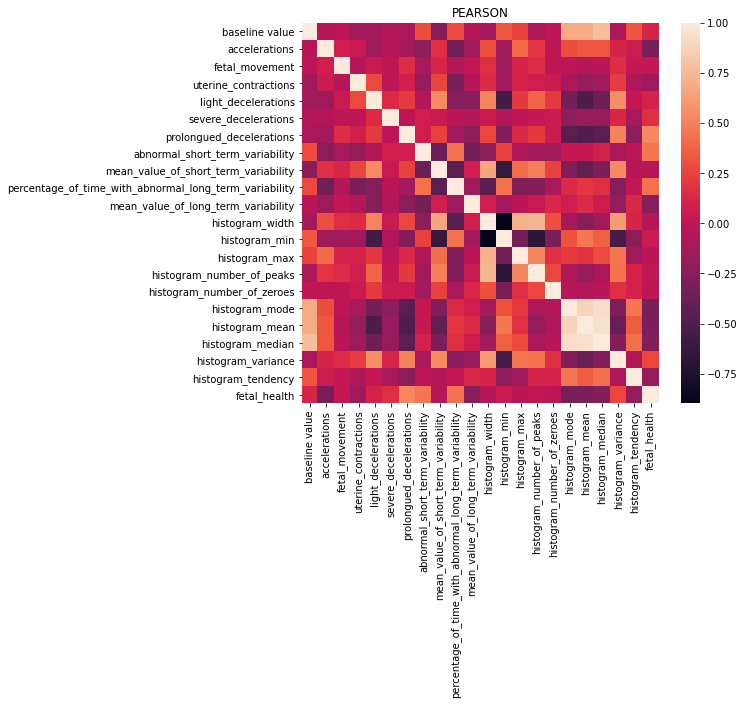

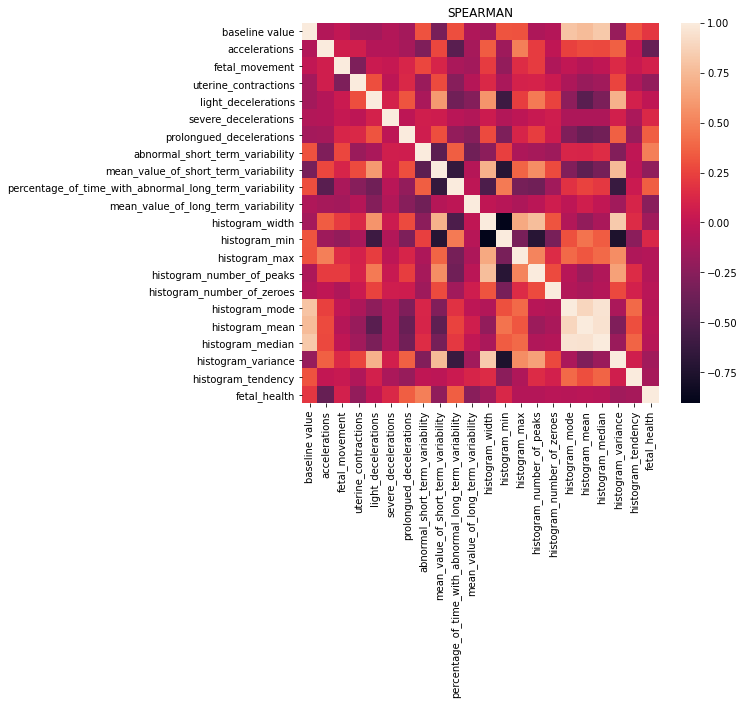

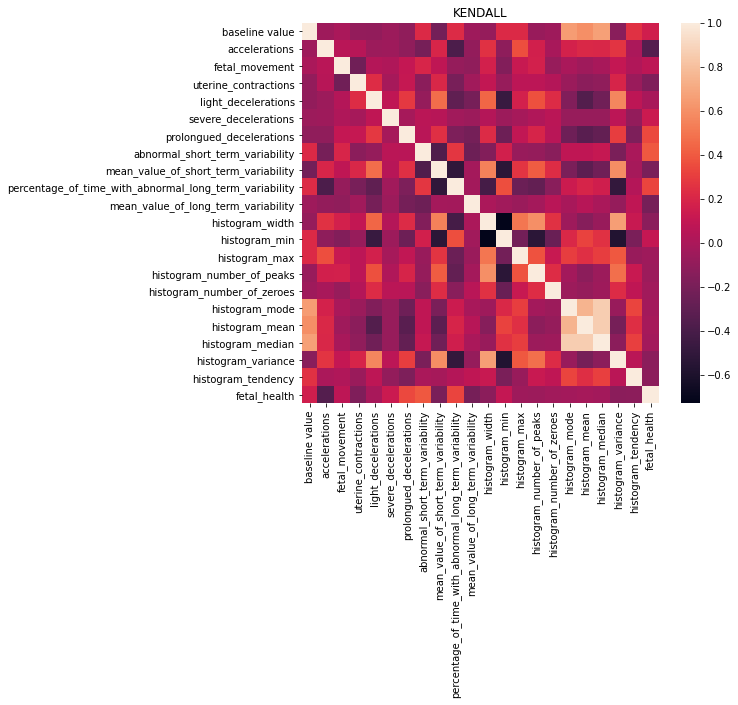

In [23]:
plt.figure(figsize=(8,7))
sns.heatmap(df_nuovo.corr(method='pearson'))
plt.title('PEARSON')
plt.figure(figsize=(8,7))
sns.heatmap(df_nuovo.corr(method='spearman'))
plt.title('SPEARMAN')
plt.figure(figsize=(8,7))
sns.heatmap(df_nuovo.corr(method='kendall'))
plt.title('KENDALL')

Sembra ci sia una correlazione tra gli attributi ... , tutti e tre i metodi concordano più o meno su ... ... 

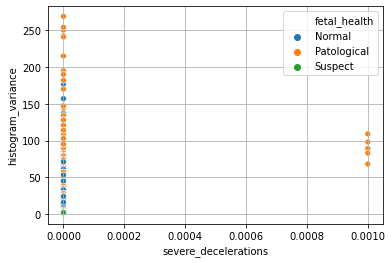

In [24]:
states={1.0:'Normal',2.0:'Suspect',3.0:'Patological'}
fetal_health=df_nuovo['fetal_health'].apply(lambda x : states[x]) ##VARIABILI CATEGORICHE

##RIVEDERE
sns.scatterplot(data=df_nuovo,x='severe_decelerations',y='histogram_variance',hue=fetal_health)
plt.grid()

Patological *histogram_variance* e *severe decelerations* hanno dei valori più alti.

In [25]:
##SCATTER MATRIX 
#sns.pairplot(df_nuovo.drop(['histogram_width',
#       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
#       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
#       'histogram_median', 'histogram_variance', 'histogram_tendency'],axis=1),hue='fetal_health')


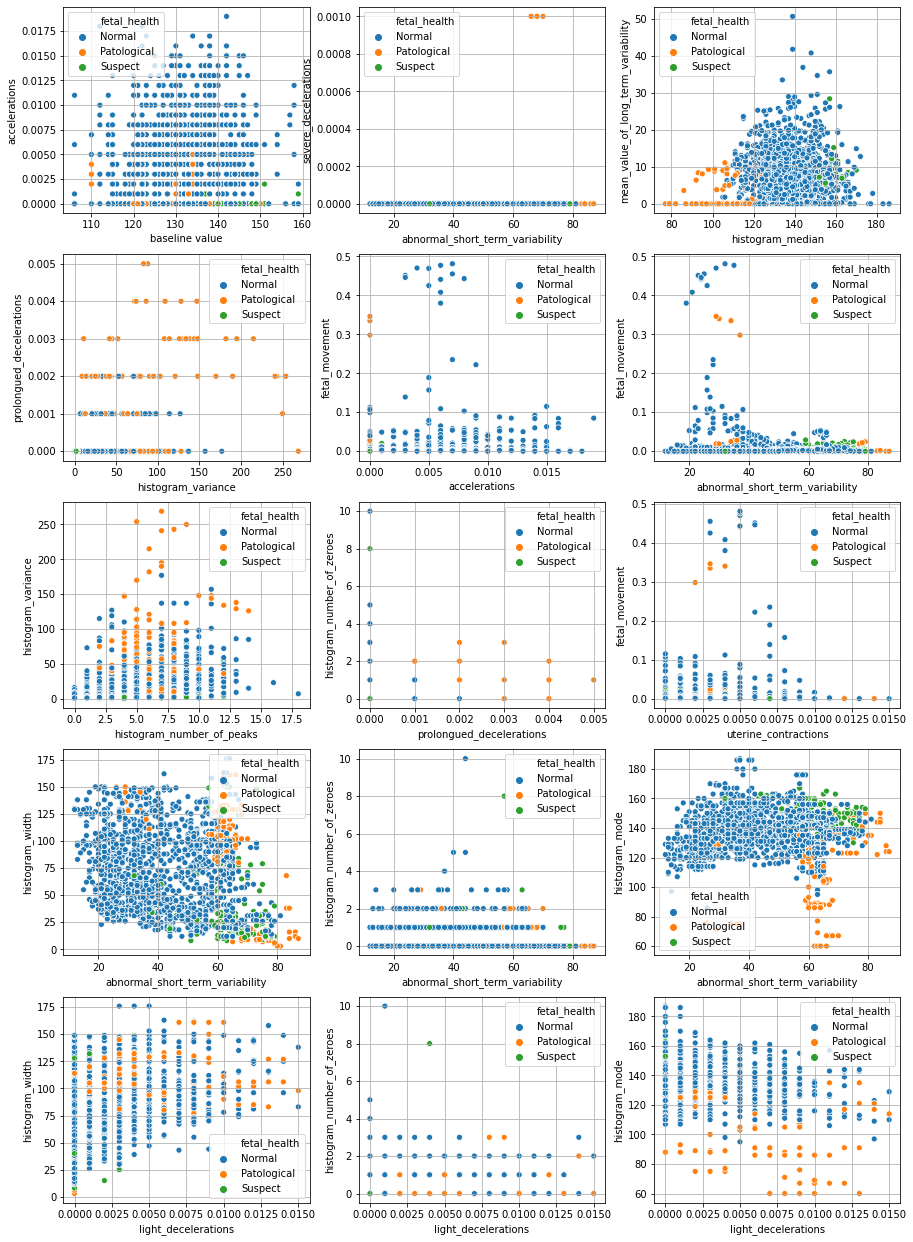

In [26]:
fig,axes=plt.subplots(5,3,figsize=(15,22))
sns.scatterplot(data=df_nuovo,x='baseline value',y='accelerations',hue=fetal_health,ax=axes[0,0],size_norm=10)
sns.scatterplot(x=df_nuovo['abnormal_short_term_variability'],y=df_nuovo['severe_decelerations'],hue=fetal_health,ax=axes[0,1])
sns.scatterplot(x=df['histogram_median'],y=df['mean_value_of_long_term_variability'],hue=fetal_health,ax=axes[0,2])

sns.scatterplot(data=df_nuovo,x='histogram_variance',y='prolongued_decelerations',hue=fetal_health,ax=axes[1,0],size_norm=10)
sns.scatterplot(x=df_nuovo['accelerations'],y=df_nuovo['fetal_movement'],hue=fetal_health,ax=axes[1,1])
sns.scatterplot(x=df['abnormal_short_term_variability'],y=df['fetal_movement'],hue=fetal_health,ax=axes[1,2])

sns.scatterplot(x=df_nuovo['histogram_number_of_peaks'],y=df_nuovo['histogram_variance'],hue=fetal_health,ax=axes[2,0])
sns.scatterplot(x=df['prolongued_decelerations'],y=df['histogram_number_of_zeroes'],hue=fetal_health,ax=axes[2,1])
sns.scatterplot(data=df_nuovo,x='uterine_contractions',y='fetal_movement',hue=fetal_health,ax=axes[2,2],size_norm=10)


sns.scatterplot(x=df_nuovo['abnormal_short_term_variability'],y=df_nuovo['histogram_width'],hue=fetal_health,ax=axes[3,0])
sns.scatterplot(x=df['abnormal_short_term_variability'],y=df['histogram_number_of_zeroes'],hue=fetal_health,ax=axes[3,1])
sns.scatterplot(data=df_nuovo,x='abnormal_short_term_variability',y='histogram_mode',hue=fetal_health,ax=axes[3,2],size_norm=10)

sns.scatterplot(x=df_nuovo['light_decelerations'],y=df_nuovo['histogram_width'],hue=fetal_health,ax=axes[4,0])
sns.scatterplot(x=df['light_decelerations'],y=df['histogram_number_of_zeroes'],hue=fetal_health,ax=axes[4,1])
sns.scatterplot(data=df_nuovo,x='light_decelerations',y='histogram_mode',hue=fetal_health,ax=axes[4,2],size_norm=10)


axes[0,0].grid()
axes[0,1].grid()
axes[0,2].grid()
axes[1,0].grid()
axes[1,1].grid()
axes[1,2].grid()
axes[2,0].grid()
axes[2,1].grid()
axes[2,2].grid()
axes[3,0].grid()
axes[3,1].grid()
axes[3,2].grid()
axes[4,0].grid()
axes[4,1].grid()
axes[4,2].grid()



## Analisi risultati scatterplot

Come si può notare dai grafici sopra, sono emerse delle relazioni, in particolare notiamo che per alcune colonne le classi *Patological* sono quelle che assumo i valori estremi, come ad esempio *histogram_median*,*light_decelerations*,*abnormal_short_term_variability*.

Notiamo anche che ad esempio sullo scatter plot *baseline value*,*accelerations* non ci sono moltissime differenze tra le varie classi.

Vediamo usando un diagramma Radar se ci sono differenze nei valori medi degli attributi per le classi

In [27]:
from sklearn.preprocessing import MinMaxScaler

def plot_radar_info(df_nuovo,label=['severe_decelerations','uterine_contractions','fetal_movement']):
    mmscaler=MinMaxScaler()
    df_=pd.DataFrame(mmscaler.fit_transform(df_nuovo),columns=df_nuovo.columns)
    
    a=df_.groupby('fetal_health').mean() ## anche median
    labels=np.array(label)
    #print(a)
    stats_1=a.iloc[0][labels].values
    stats_2=a.iloc[1][labels].values
    stats_3=a.iloc[2][labels].values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats_1=np.concatenate((stats_1,[stats_1[0]]))
    stats_2=np.concatenate((stats_2,[stats_2[0]]))
    stats_3=np.concatenate((stats_3,[stats_3[0]]))

    angles=np.concatenate((angles,[angles[0]]))
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats_1, 'o-', linewidth=2,label='Normale')
    ax.fill(angles, stats_1, alpha=0.35)
    ax.plot(angles, stats_2, 'o-', linewidth=2,label='Suspect')
    ax.fill(angles, stats_2, alpha=0.22)
    ax.plot(angles, stats_3, 'o-', linewidth=2,label='Patological')
    ax.fill(angles, stats_3, alpha=0.30)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title("Radar valori medi per classe")
    ax.grid(True)
    ax.legend()


#plot_radar_info(df_nuovo,label=df_nuovo.drop(['fetal_health'],axis=1).columns)

Il plot radar mostra come mediamente i valori si concentrano/distribuiscono sugli attributi, picchi interessanti sono *abnormal_short_term_variability* e *light_decelerations* che erano già stati riscontrati negli scatter plot 

## Analisi densità

Vediamo le CMF per vedere se le features hanno distribuzioni simili.


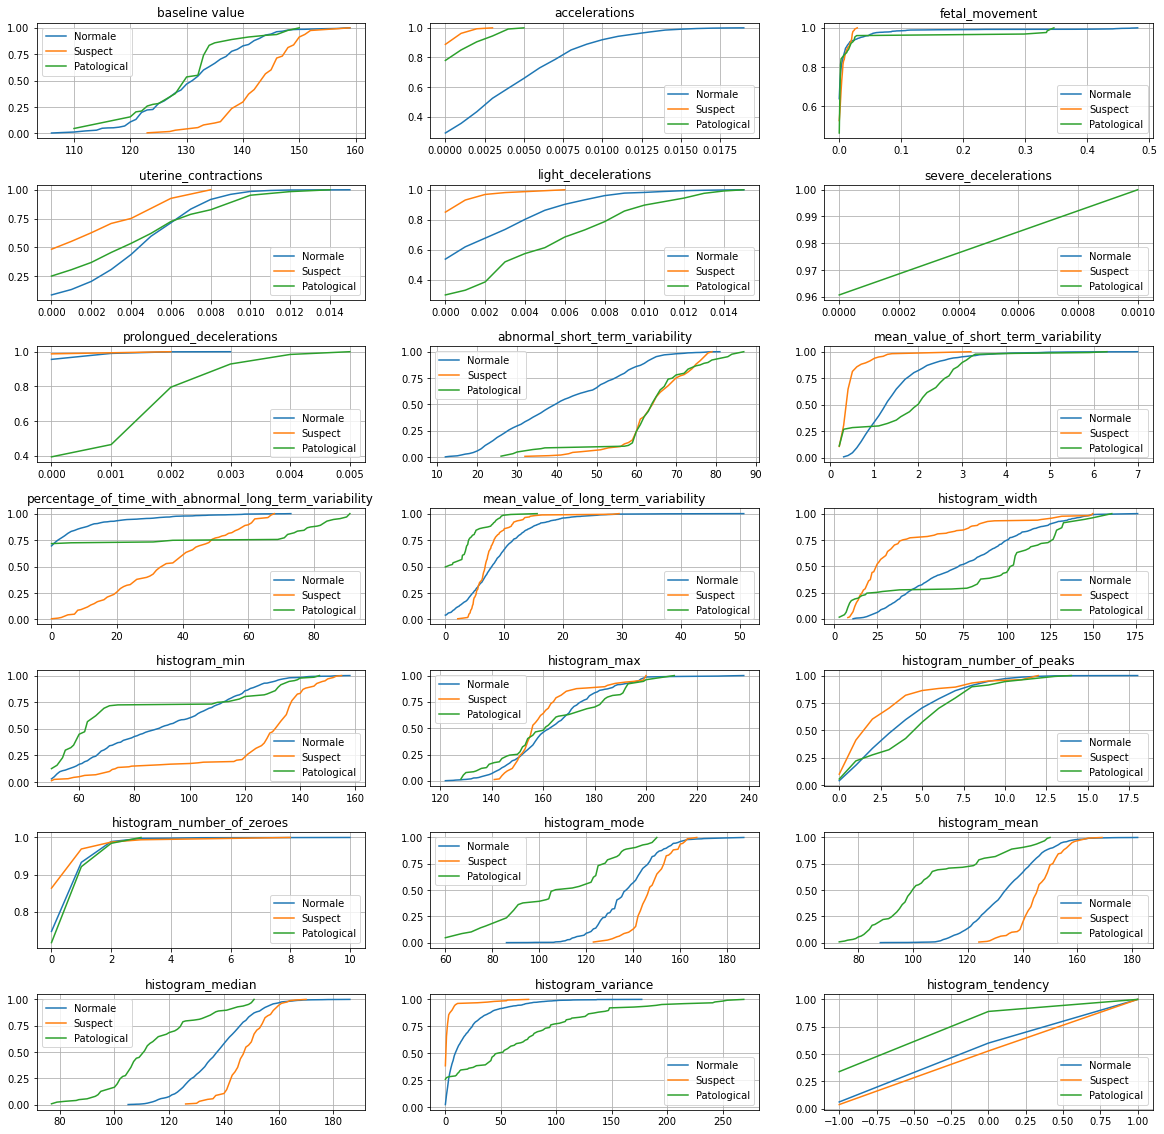

In [28]:
def cumulative_distr(df):
    ##CMF
    fig,axes=plt.subplots(7,3,figsize=(20,20))
    plt.subplots_adjust(hspace=0.4)
    for col,ax in zip(df.columns,axes.flatten()):
        att=col
        a=df[df['fetal_health']==1][att].value_counts(normalize=True).sort_index().cumsum()
        b=df[df['fetal_health']==2][att].value_counts(normalize=True).sort_index().cumsum()
        c=df[df['fetal_health']==3][att].value_counts(normalize=True).sort_index().cumsum()
        #plt.figure(figsize=(4,4))
        ax.plot(a.index,a.values)
        ax.plot(b.index,b.values)
        ax.plot(c.index,c.values)
        ax.grid()
        ax.set_title(col)
        ax.legend(['Normale','Suspect' ,'Patological'])
        #plt.show()

##CUMULATIVE DISTR
cumulative_distr(df_nuovo)

## Considerazioni CMF

Le CMF ci fanno capire se le features per le varie classi seguono una stessa distribuzione.

Inoltre CMF ci permettono di rispondere ad alcune domande del tipo: "Quanto è probabile che per una colonna si riscontri un certo intervallo di valori per le varie classi?"


In [29]:
att='baseline value'
a=df[df['fetal_health']==1][att].value_counts(normalize=True).sort_index().cumsum()
b=df[df['fetal_health']==2][att].value_counts(normalize=True).sort_index().cumsum()
c=df[df['fetal_health']==3][att].value_counts(normalize=True).sort_index().cumsum()

lim_inferiore=120
lim_superiore=130

print(f'Qual è la probabilità di avere un baseline value tra {lim_inferiore} e {lim_superiore} per le varie classi?')

print("Per classe Normale:",a[lim_superiore]-a[lim_inferiore])
print("Per la classe Sospetta:",b[lim_superiore]-b[lim_inferiore])
print("Per la classe Patologica:",c[lim_superiore]-c[lim_inferiore])


##
att='histogram_variance'
a=df[df['fetal_health']==1][att].value_counts(normalize=True).sort_index().cumsum()
b=df[df['fetal_health']==2][att].value_counts(normalize=True).sort_index().cumsum()
c=df[df['fetal_health']==3][att].value_counts(normalize=True).sort_index().cumsum()

lim_inferiore=15
lim_superiore=45

print(f'\n\nQual è la probabilità di avere un histogram_variance value tra {lim_inferiore} e {lim_superiore} per le varie classi?')

print("Per classe Normale:",a[lim_superiore]-a[lim_inferiore])
print("Per la classe Sospetta:",b[lim_superiore]-b[lim_inferiore])
print("Per la classe Patologica:",c[lim_superiore]-c[lim_inferiore])



Qual è la probabilità di avere un baseline value tra 120 e 130 per le varie classi?
Per classe Normale: 0.3428920073215376
Per la classe Sospetta: 0.10380622837370244
Per la classe Patologica: 0.33908045977011503


Qual è la probabilità di avere un histogram_variance value tra 15 e 45 per le varie classi?
Per classe Normale: 0.2635753508236729
Per la classe Sospetta: 0.024221453287197603
Per la classe Patologica: 0.14367816091954033


## QQ-PLOT

Vediamo il QQ-PLOT per verificare se la distribuzione dei valori delle features segue una distribuzione nota (normale).

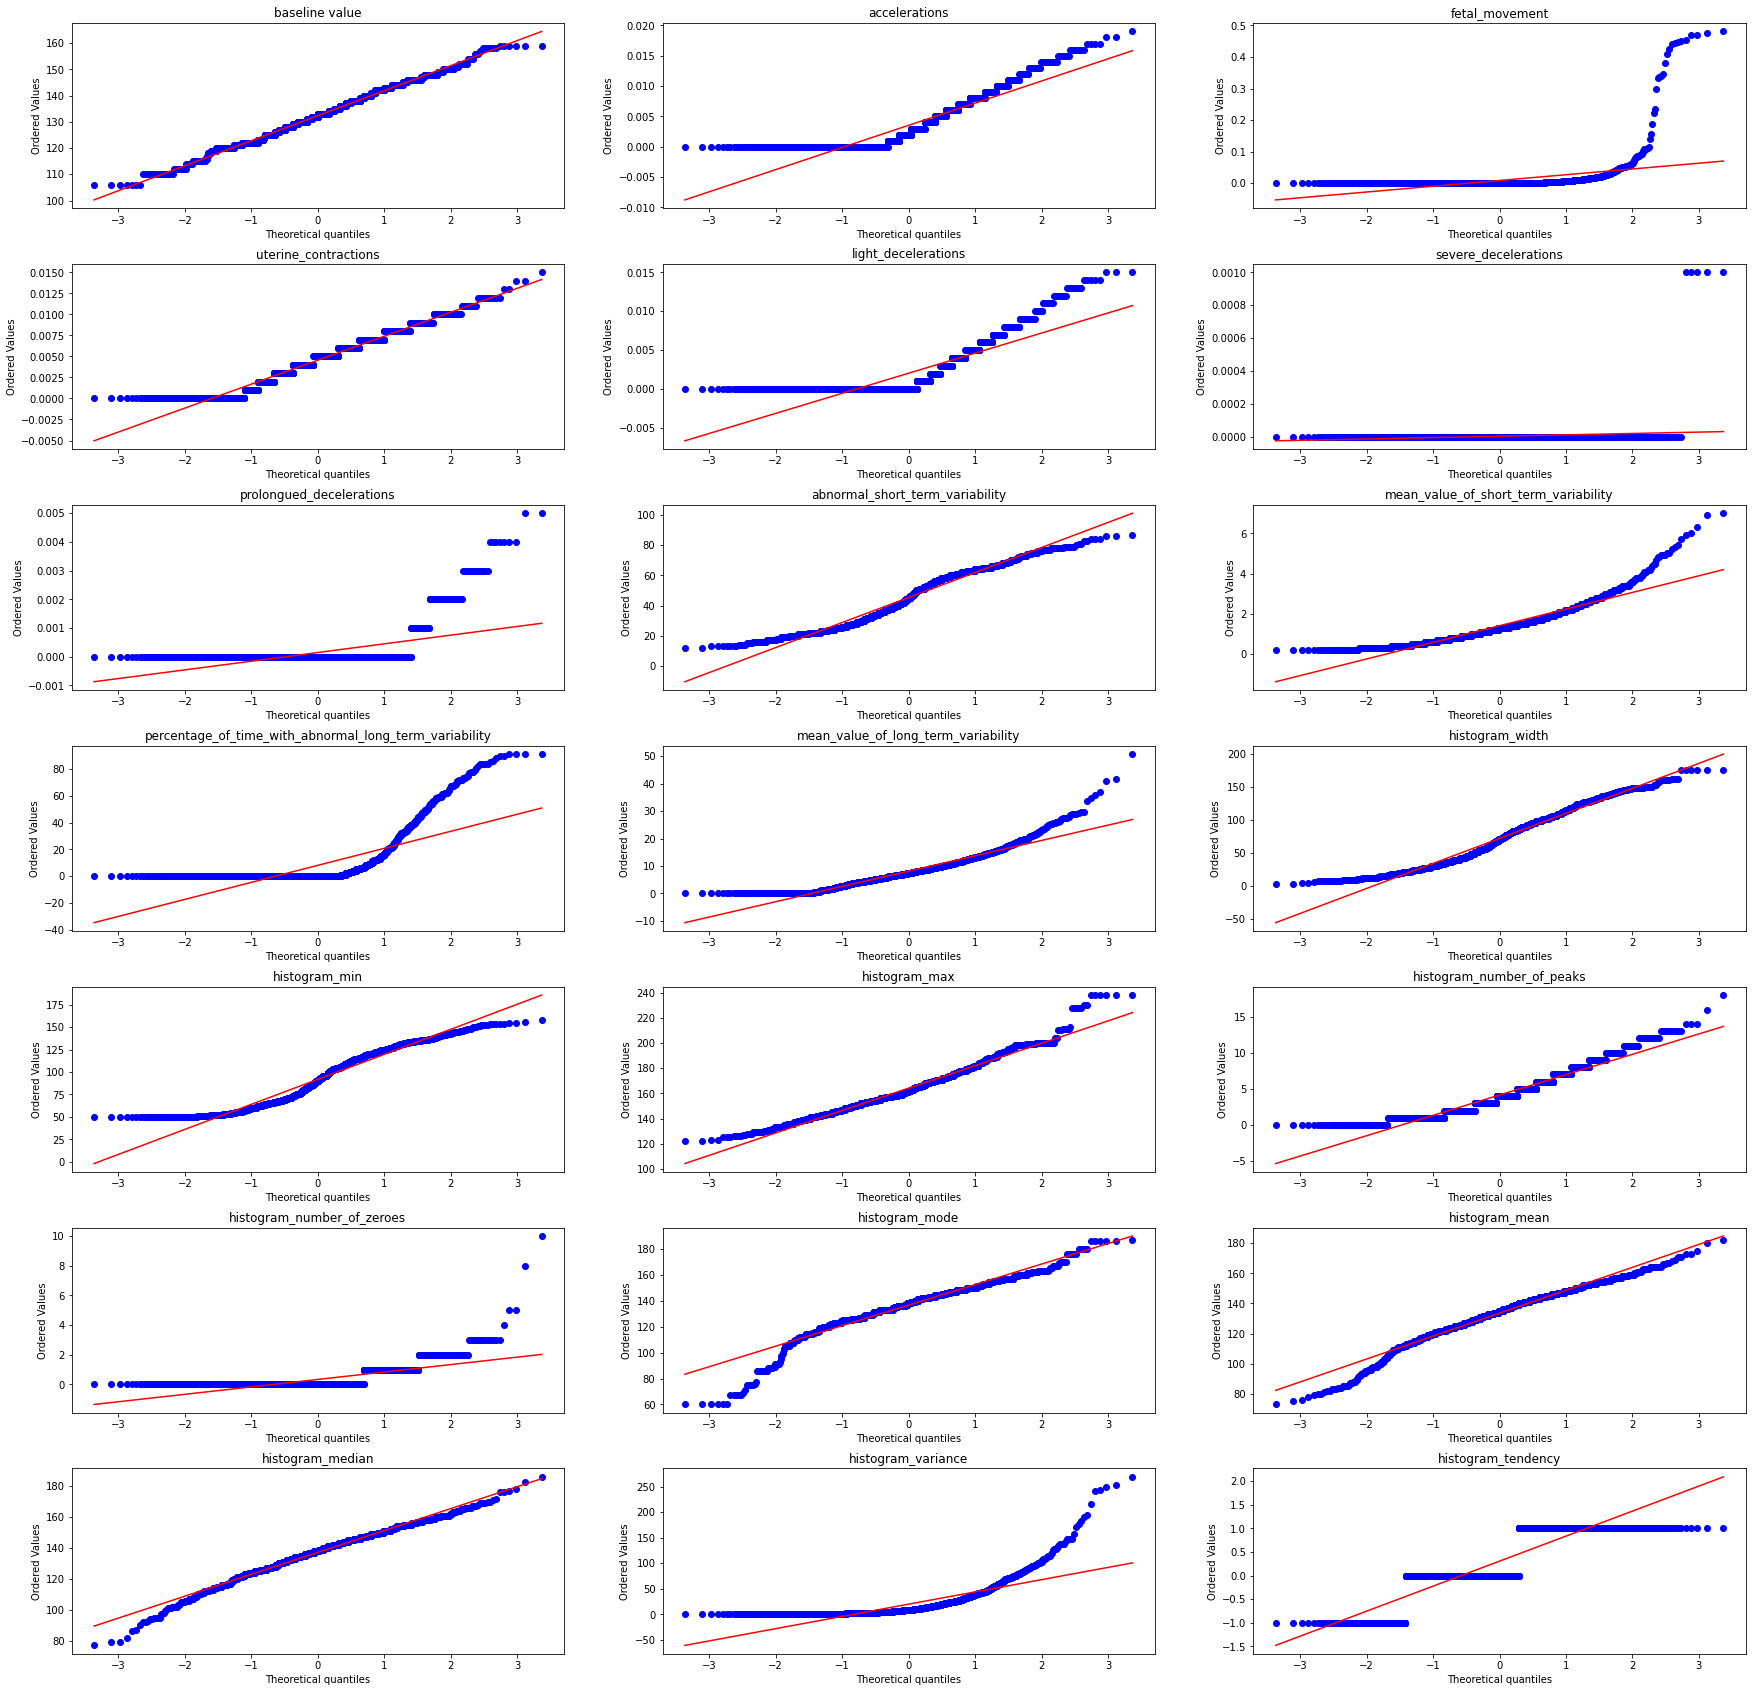

In [30]:
import scipy.stats as stats

def qqplot_info(df_nuovo):
    fig,axes=plt.subplots(7,3,figsize=(30,30))
    plt.subplots_adjust(hspace=0.3)
    for col,ax_ in zip(df_nuovo.columns,axes.flatten()):

        stats.probplot(df_nuovo[col], dist=stats.norm,plot=ax_)
        ax_.set_title(col)


#stats.probplot(df_nuovo['accelerations'], dist=stats.loggamma, sparams=(10),plot=plt)
qqplot_info(df_nuovo)
##QQPLOT CONTINUARE



Riscontriamo che alcune colonne seguono, in generale, una distribuzione normale seppur con qualche distacco:
<li>baseline value: code sinistra più larga e destra più piccola</li> 
<li>abnormal_short_term_variability : code corte, 2 picchi</li> 
<li>mean_value_short_term_variability : asimmetria a sinistra ,coda destra più lunga</li> 
<li>mean_value_long_term_variability : asimmetria a sinistra ,coda destra più lunga</li> 
<li>histogram width: code corte</li> 
<li>histogram min: code corte , 2 picchi</li> 
<li>histogram max: asimmetria a sinistra, code lunghe</li> 
<li>histogram mode: code lunghe</li> 
<li>histogram mean: asimmetria a sinistra</li> 
<li>histogram median: asimmetria a sinistra</li> 
<li>histogram variance : asimmetria a sinistra e conda lunga, picco più appuntito </li> 


Le altre colonne seguono una distribuzione profondamente diversa dalla normale.



## PCA


Il nostro dataset ha 21 colonne di features, sono molte cercare delle relazioni tra le feature potrebbe essere complicato, proviamo ad usare una tecnica di riduzione della dimensionalità chiamata PCA.


[0.31003953 0.50698562 0.62490562 0.72268315 0.78663692 0.83573193
 0.86937568 0.89879631 0.92047067]


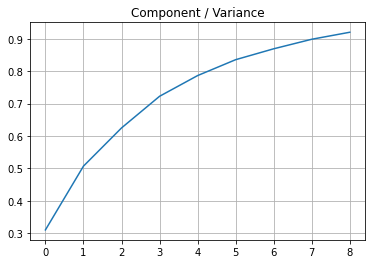

In [15]:
##### PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import numpy as np


mmscaler=MinMaxScaler()
df_scaled=pd.DataFrame(mmscaler.fit_transform(df_nuovo),columns=df_nuovo.columns )##scaler DF [0-1]

n_comp=9
model_PCA=PCA(n_components=n_comp) ##90%
model_PCA.fit(df_scaled.drop(['fetal_health'],axis=1))
#print(model_PCA.explained_variance_ratio_)
print(np.cumsum(model_PCA.explained_variance_ratio_)) ## 95 bene
plt.plot(np.cumsum(model_PCA.explained_variance_ratio_))
plt.grid()
plt.title("Component / Variance")

df_pca=model_PCA.transform(df_scaled.drop(['fetal_health'],axis=1))
df_pca=pd.DataFrame(df_pca,columns=['V'+str(i) for i in range(1,n_comp+1)])
#print(df_pca.columns,'\n',df_pca.shape)
#print(df_scaled.columns,'\n',df_scaled.shape)
#print(df_nuovo.columns,'\n',df_nuovo.shape)


Siamo riusciti ad ottenere un df con solo 9 colonne (+1 per le classi) che riesce a spiegare il 91% della varianza del df originale. 

Adesso che il dataset è più gestibile vediamo se riusciamo a cogliere qualche relazione in più


In [16]:
df_nuovo.reset_index(drop=True, inplace=True)
df_pca['fetal_health']=df_nuovo['fetal_health']
#print(df_pca.info)

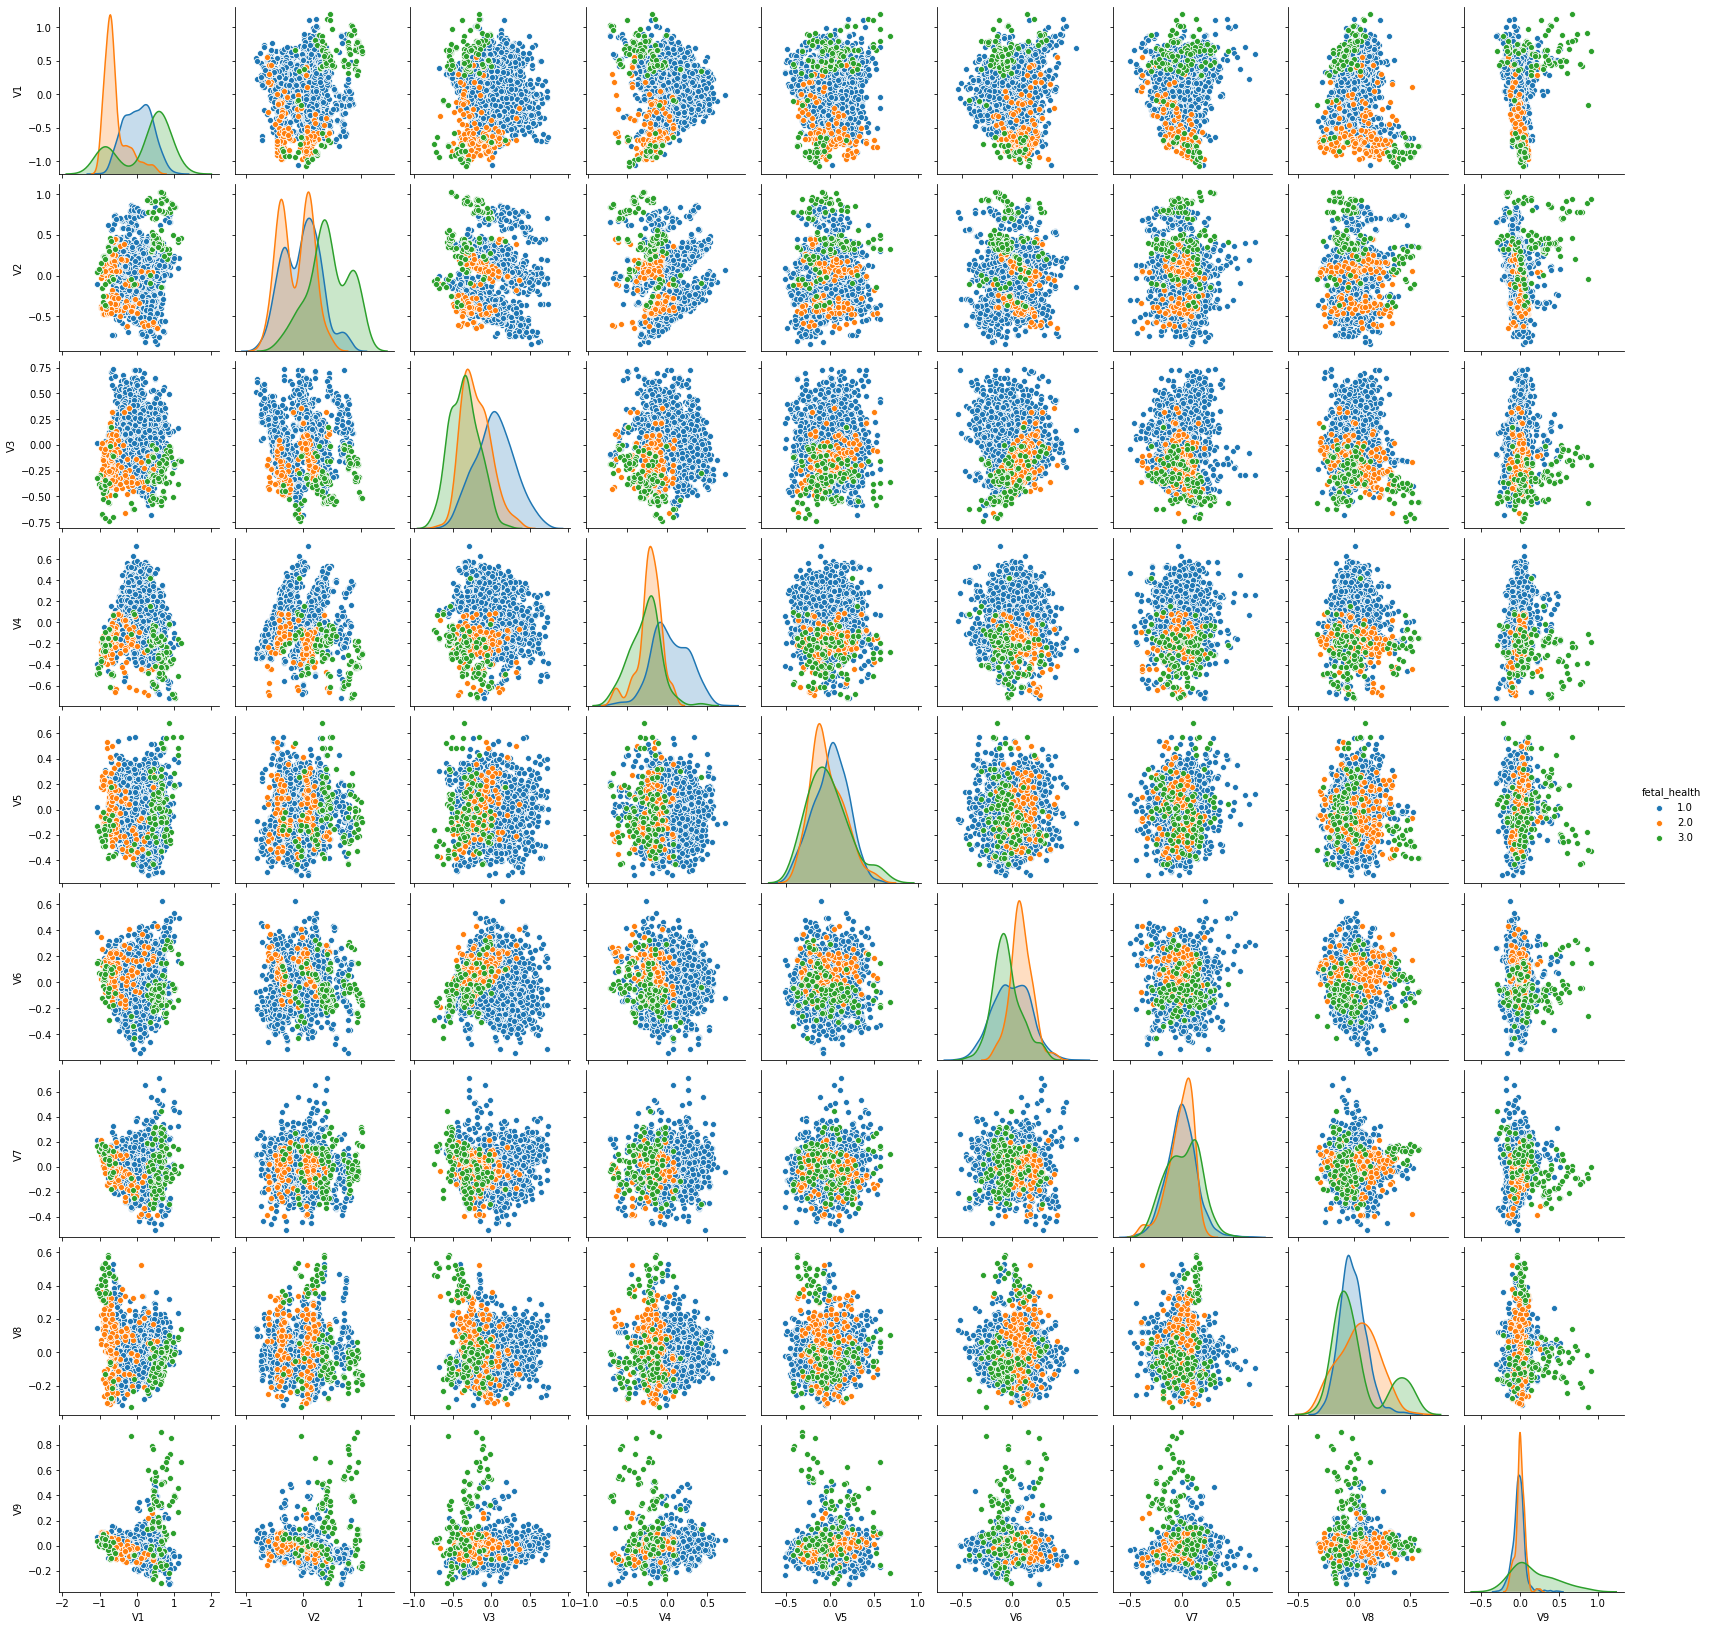

In [17]:
sns.pairplot(df_pca,hue='fetal_health')

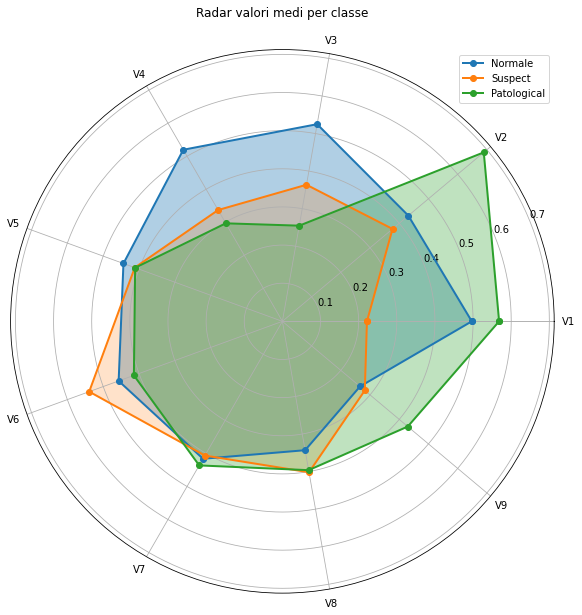

In [34]:
plot_radar_info(df_pca,label=df_pca.drop(['fetal_health'],axis=1).columns)

In media la classe *Patological* ha un valore di **V2** più alto, tuttavia non sappiamo a cosa **V2** si riferisca dato che deriva dalla PCA (dato sintentico).

In [35]:
from pandas.plotting import parallel_coordinates
####RIVEDERE
def plot_parallel(df):
    plt.figure(figsize=(40,14))
    parallel_coordinates(df,'fetal_health', color=('#556270', '#4ECDC4', '#C7F464'))
    #plt.xticks(rotation=70)
    #plt.legend(['N','S','P'])
    plt.show()
def plot_andrews(df):
    plt.figure(figsize=(30,10))
    pd.plotting.andrews_curves(df, 'fetal_health')

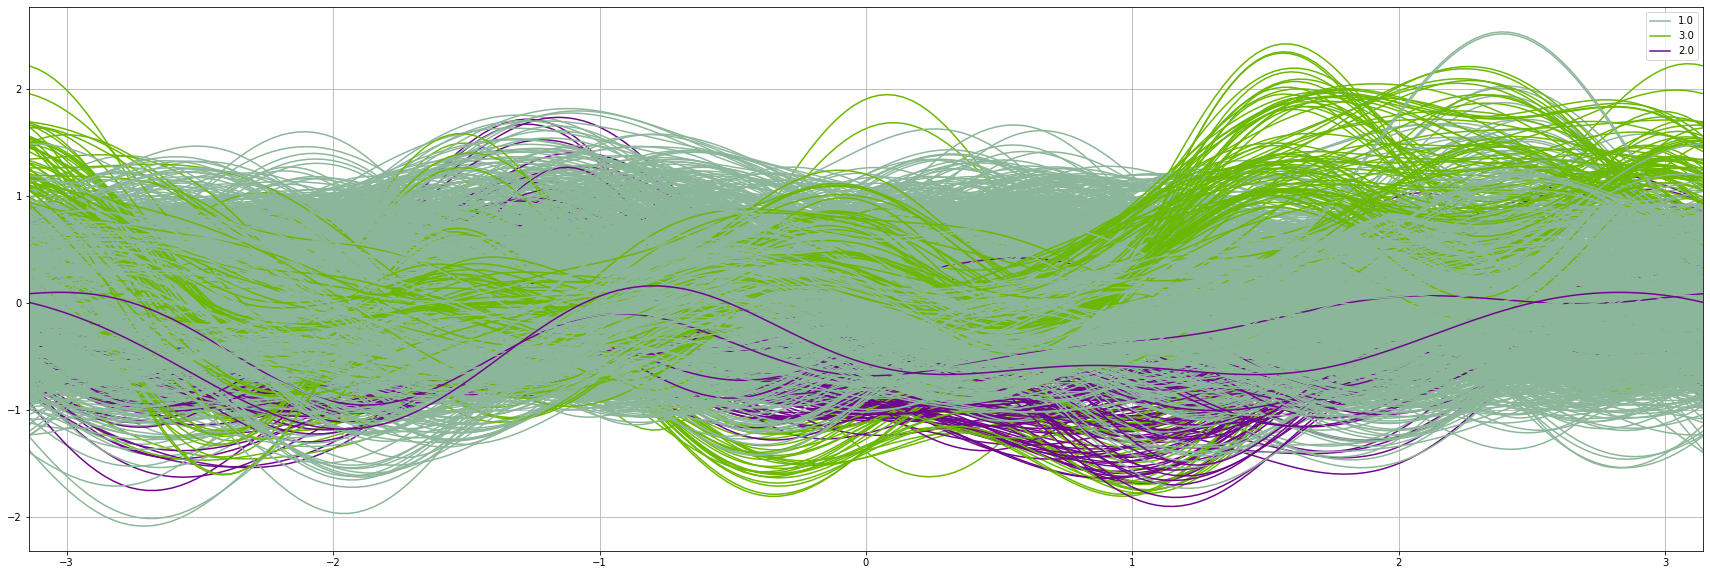

In [36]:
plot_andrews(df_pca)

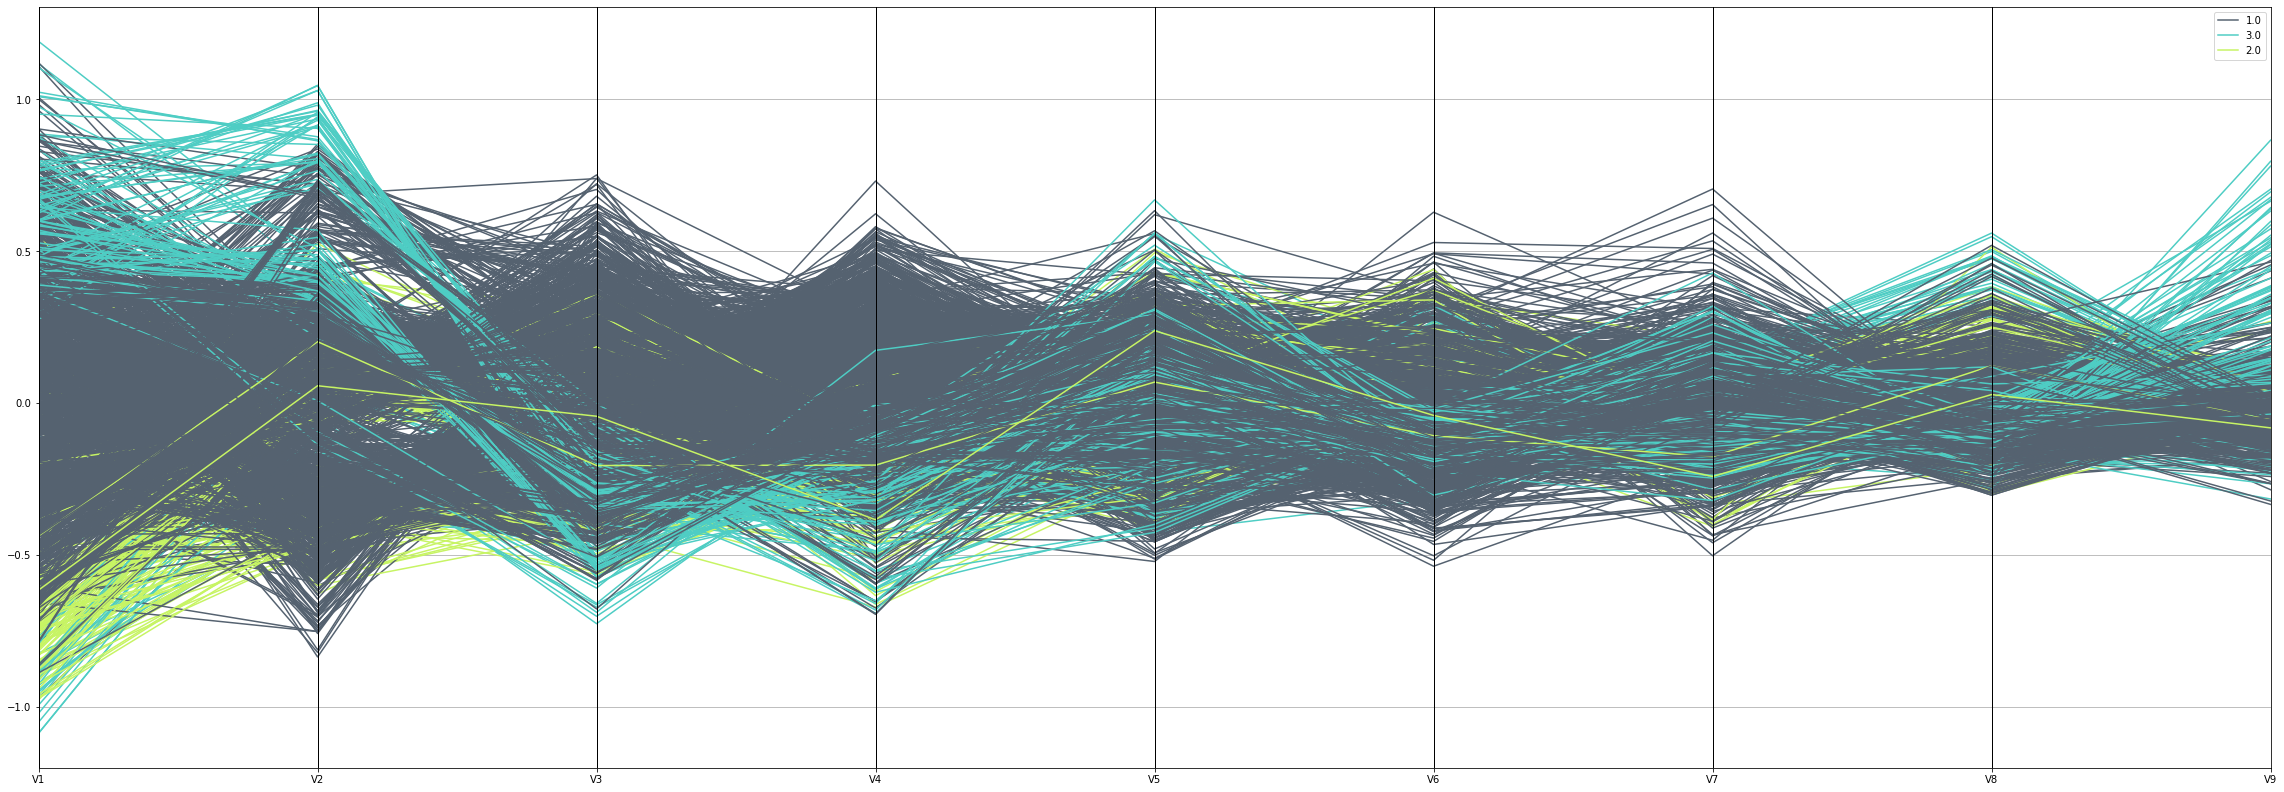

In [37]:
plot_parallel(df_pca)

## LDA

Proviamo ora a utilizzare un'altra tecnica di riduzione delle dimensioni, chiamata LDA.
Si ottiene un nuovo dataset con sole 2 colonne, proviamo a graficarle. 

(1824, 2)


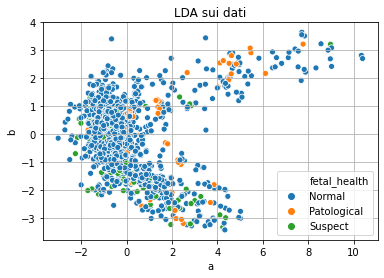

In [38]:
##LDA  SOTTO SUI DATI DF_NUOVO
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

model_LDA=LinearDiscriminantAnalysis()
mmscaler=MinMaxScaler()
df_scaled=pd.DataFrame(mmscaler.fit_transform(df_nuovo.drop(['fetal_health'],axis=1)),columns=df_nuovo.drop(['fetal_health'],axis=1).columns)
#print(df_scaled.info())
df_lda=pd.DataFrame(model_LDA.fit_transform(df_scaled,df_nuovo['fetal_health']),columns=['a','b'])
print(df_lda.shape)
sns.scatterplot(df_lda['a'],df_lda['b'],hue=fetal_health)
df_lda['fetal_health']=df_nuovo['fetal_health']
plt.title("LDA sui dati")
plt.grid()


I dati non sembrano linearmente separabili

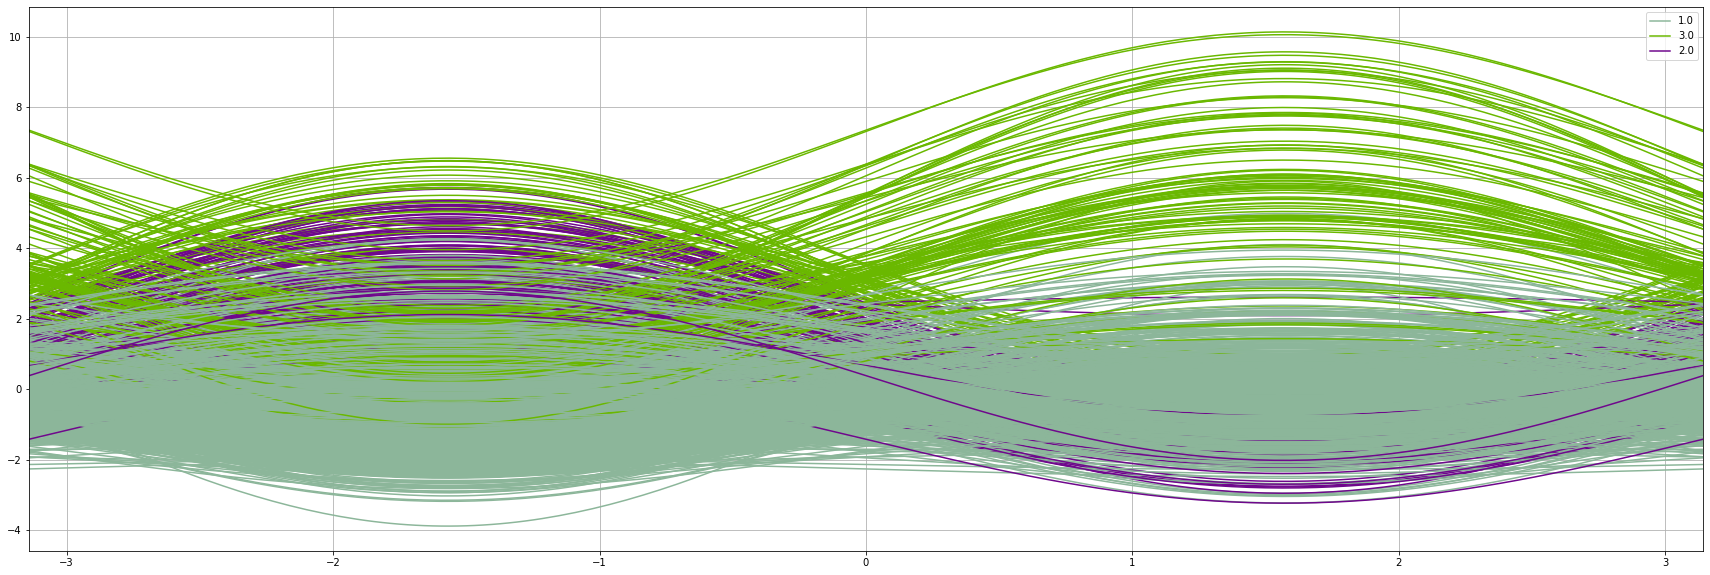

In [39]:
plot_andrews(df_lda)

In [40]:
#plot_parallel(df_lda)

# Regressione


Col: baseline value (1.0, 0.0)
Col: accelerations (-0.04312114180233034, 0.06558857080342533)
Col: fetal_movement (-0.019064210637109058, 0.4158076268785438)
Col: severe_decelerations (-0.06228795006414671, 0.007791504765525642)
Col: prolongued_decelerations (-0.09195687927650756, 8.390402192049457e-05)
Col: abnormal_short_term_variability (0.29191423839093217, 3.6807651312079276e-37)
Col: percentage_of_time_with_abnormal_long_term_variability (0.2772117305852626, 1.550917392695338e-33)
Col: mean_value_of_long_term_variability (-0.040798353792429756, 0.08151550512157794)
Col: histogram_min (0.3330109472240331, 1.7495072674080207e-48)
Col: histogram_max (0.25827282900046666, 3.496013558865966e-29)
Col: histogram_number_of_peaks (-0.09133917351356065, 9.366751033915732e-05)
Col: histogram_number_of_zeroes (-0.001011869709131117, 0.9655535566048835)
Col: histogram_mode (0.6878532475880896, 7.881854461408726e-256)
Col: histogram_mean (0.6938883998838623, 3.8070999834186247e-262)
Col: histo

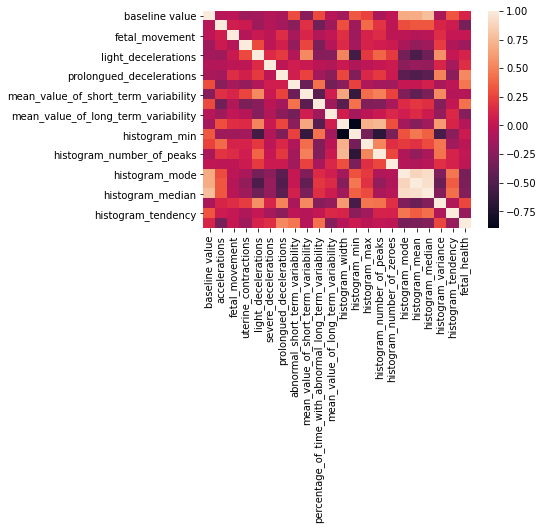

In [41]:
#plt.figure(figsize=(30,30))
from scipy.stats import pearsonr
sns.heatmap(df_nuovo.corr())

for col in df_nuovo.columns:
    if pearsonr(df_nuovo['baseline value'],df_nuovo[col])[0]>=-.10:
        print("Col:",col,pearsonr(df_nuovo['baseline value'],df_nuovo[col]))


                                 OLS Regression Results                                
Dep. Variable:          accelerations   R-squared (uncentered):                   0.817
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              536.7
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:23:36   Log-Likelihood:                          8510.6
No. Observations:                1824   AIC:                                 -1.699e+04
Df Residuals:                    1809   BIC:                                 -1.691e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

Text(0.5, 1.0, 'Plot dei residui')

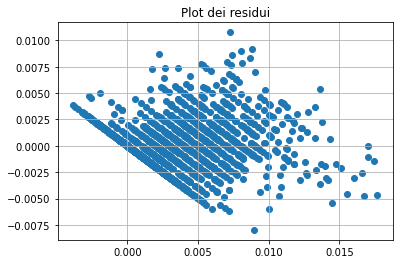

In [67]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

## 
col_regr=['mean_value_of_long_term_variability','abnormal_short_term_variability','histogram_mean','histogram_max','histogram_variance','histogram_tendency']
model = sm.OLS(df_nuovo['accelerations'],df_nuovo.drop(['fetal_movement','histogram_variance','abnormal_short_term_variability','histogram_max','uterine_contractions','accelerations','fetal_health'],axis=1))
results = model.fit()
print(results.summary())
y_pred=results.predict()

print("Mean absolute error:",mean_absolute_error(df_nuovo['baseline value'],y_pred))
print("Mean square error:",mean_squared_error(df_nuovo['baseline value'],y_pred))
#y_pred[y_pred<0]=0
residuals=df_nuovo['accelerations']-y_pred
plt.scatter(y_pred,residuals)
plt.grid()
plt.title("Plot dei residui")
#print(max(y_pred[y_pred<0]))
#plt.xlabel()

                                 OLS Regression Results                                
Dep. Variable:                     V2   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              853.3
Date:                Sun, 14 Mar 2021   Prob (F-statistic):                        0.00
Time:                        22:24:36   Log-Likelihood:                          1376.0
No. Observations:                1824   AIC:                                     -2716.
Df Residuals:                    1806   BIC:                                     -2617.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                                             coef    std err          t      P>|t|      [0.025      0.97

Text(0.5, 1.0, 'Plot dei residui')

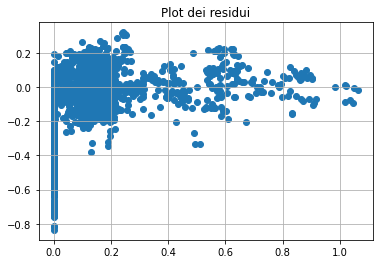

In [69]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

## 
##col_regr=['mean_value_of_long_term_variability','abnormal_short_term_variability','histogram_mean','histogram_max','histogram_variance','histogram_tendency']
model = sm.OLS(df_pca['V1'],df_nuovo.drop(['histogram_number_of_zeroes','histogram_mean','fetal_health'],axis=1))
results = model.fit()
print(results.summary())
y_pred=results.predict()

print("Mean absolute error:",mean_absolute_error(df_pca['V1'],y_pred))
print("Mean square error:",mean_squared_error(df_pca['V1'],y_pred))
y_pred[y_pred<0]=0
residuals=df_pca['V2']-y_pred
plt.scatter(y_pred,residuals)
plt.grid()
plt.title("Plot dei residui")
#print(max(y_pred[y_pred<0]))
#plt.xlabel()

## CLASSIFICAZIONE 

Adesso cercheremo di classificare i nostri record, attraverso vari metodi:
<ul>
    <li>GaussianNB</li>
    <li>RandomForest</li>
    <li>SVM</li>
    <li>KNN</li>
    <li>Logistic Regression </li>
</ul>

LOGISTIC

Confusion Matrix:
[[372   0   3]
 [ 20  33   0]
 [  1   5  22]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       375
         2.0       0.87      0.62      0.73        53
         3.0       0.88      0.79      0.83        28

    accuracy                           0.94       456
   macro avg       0.90      0.80      0.84       456
weighted avg       0.93      0.94      0.93       456

Accuracy 0.9364035087719298 

Cross_val_score:  0.9144257112750264 

GNB

Confusion Matrix:
[[339  29   7]
 [  2  51   0]
 [  0  10  18]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.90      0.95       375
         2.0       0.57      0.96      0.71        53
         3.0       0.72      0.64      0.68        28

    accuracy                           0.89       456
   macro avg       0.76      0.84      0.78       456
weighted avg       0.93      0.89  

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   10.5s finished


BEST SVM: SVC(C=10, gamma=1, probability=True)
SVM

Confusion Matrix:
[[373   2   0]
 [ 12  39   2]
 [  0   4  24]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       375
         2.0       0.87      0.74      0.80        53
         3.0       0.92      0.86      0.89        28

    accuracy                           0.96       456
   macro avg       0.92      0.86      0.89       456
weighted avg       0.95      0.96      0.95       456

Accuracy 0.956140350877193 

Cross_val_score:  0.9094520547945205 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   21.0s finished


BEST RF: RandomForestClassifier(n_estimators=200)
RF


Confusion Matrix:
[[370   2   3]
 [  8  45   0]
 [  0   3  25]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98       375
         2.0       0.90      0.85      0.87        53
         3.0       0.89      0.89      0.89        28

    accuracy                           0.96       456
   macro avg       0.92      0.91      0.92       456
weighted avg       0.96      0.96      0.96       456

Accuracy
0.9649122807017544
Cross_val_score:  0.9303402077374681 

BEST KNN: KNeighborsClassifier(n_neighbors=3)
KNN

Confusion Matrix:
[[370   2   3]
 [ 14  37   2]
 [  0   4  24]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       375
         2.0       0.86      0.70      0.77        53
         3.0       0.83      0.86      0.84        28

    accuracy                           0.95       456


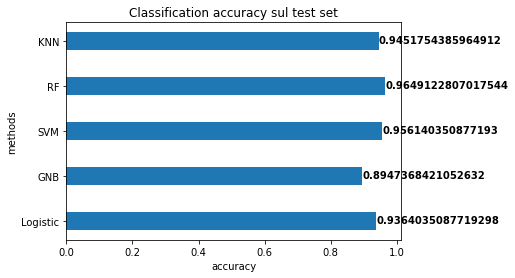

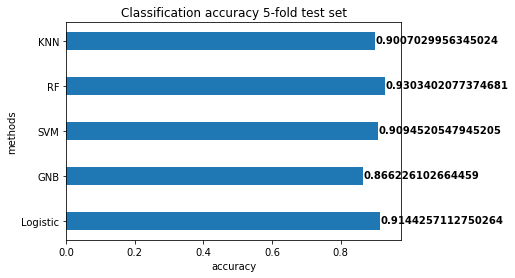

In [44]:
## PROVIAMO CON GLI ALGORTMI DI CLASSIFICAZIONE SUL DF_NUOVO

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def classification_info(df_nuovo,verbose=False,cross_validation=False):
    n_cv=5
    n_jobs=5
    np.random.seed(999)
    accuracy_list=[]
    accuracy_kfold=[]
    methods=['Logistic','GNB','SVM','RF','KNN']
    
    mmscaler=MinMaxScaler()##SCALER [0-1]
    df_nuovo_scaled=pd.DataFrame(mmscaler.fit_transform(df_nuovo),columns=df_nuovo.columns)## SCALER
    X_train,X_test,y_train,y_test=train_test_split(df_nuovo_scaled.drop(['fetal_health'],axis=1),df_nuovo['fetal_health'],random_state=42)
    
    
    ##LOGISTIC
    model_LOGIT = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model_LOGIT.fit(X_train,y_train)
    y_pred=model_LOGIT.predict(X_test)
    print("LOGISTIC")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        a=np.mean(cross_val_score(model_LOGIT, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv))
        accuracy_kfold.append(a)
        print("Cross_val_score: ",a,"\n")## informarsi
    
    
    
    ##GAUSSIAN NAIVE BAYES
    model_GNB=GaussianNB()  #priors=[0.5,0.5,asd]
    model_GNB.fit(X_train,y_train)
    y_pred=model_GNB.predict(X_test)
    print("GNB")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        a=np.mean(cross_val_score(model_GNB, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv))
        accuracy_kfold.append(a)
        print("Cross_val_score: ",a,"\n")## informarsi
    
    
    #SVM
    
    model_SVC=SVC(probability=True)
    param_grid = [
      {'C': [1, 10,50, 100], 'kernel': ['linear']}, #parametri da utilizzare con kernel lineare
      {'C': [1, 10,50, 100], 'gamma': [10,1,0.01], 'kernel': ['rbf']}, #parametri da utilizzare con kernel rbf
      #{'C': [1, 10, 100],'degree':[2,3,4,5] ,'gamma': [0.01, 0.05, 0.001], 'kernel': ['poly']} #parametri da utilizzare con kernel polinomiale
    ]

    grid_search=GridSearchCV(model_SVC,param_grid,verbose=1,n_jobs=n_jobs,cv=n_cv)
    grid_search.fit(X_train,y_train)
    best_svm = grid_search.best_estimator_
    best_svm.fit(X_train,y_train)
    y_pred=best_svm.predict(X_test)
    print("BEST SVM:",best_svm)
    print("SVM")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        a=np.mean(cross_val_score(best_svm, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv))
        accuracy_kfold.append(a)
        print("Cross_val_score: ",a,"\n")## informarsi
    
    

    ##RF
    param_grid = {'max_depth': [3,5, 10, 15, None], 'n_estimators': [25,50, 100, 150, 200]}
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, verbose=1, n_jobs=n_jobs, cv=n_cv)
    grid_search.fit(X_train,y_train)
    best_rf = grid_search.best_estimator_
    best_rf.fit(X_train,y_train)
    y_pred=best_rf.predict(X_test)
    print("BEST RF:",best_rf)
    print("RF\n")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy")
    print(accuracy_score(y_test, y_pred, normalize=True))
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        a=np.mean(cross_val_score(best_rf, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv))
        accuracy_kfold.append(a)
        print("Cross_val_score: ",a,"\n")## informarsi
    
    

    
    #KNN
    param_grid = [ {'n_neighbors':range(1,35)}]
    gs = GridSearchCV(KNeighborsClassifier(), param_grid)
    gs.fit(X_train, y_train)
    best_knn = gs.best_estimator_
    best_knn.fit(X_train,y_train)
    y_pred=best_knn.predict(X_test)
    print("BEST KNN:",best_knn)
    print("KNN")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        a=np.mean(cross_val_score(best_knn, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv))
        accuracy_kfold.append(a)
        print("Cross_val_score: ",a,"\n")## informarsi
    
    
    """
    ##QDA
    model_QDA=QuadraticDiscriminantAnalysis()
    model_QDA.fit(X_train,y_train)
    y_pred=model_QDA.predict(X_test)
    print("QDA")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        print("Cross_val_score: ",np.mean(cross_val_score(model_QDA, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv)),"\n")## informarsi
    
    
    
    ##LDA
    model_LDA=LinearDiscriminantAnalysis()
    model_LDA.fit(X_train,y_train)
    y_pred=model_LDA.predict(X_test)
    print("LDA")
    if verbose==True:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report")
        print(classification_report(y_test, y_pred))
    print("Accuracy",accuracy_score(y_test, y_pred, normalize=True),"\n")
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))
    if cross_validation==True:
        print("Cross_val_score: ",np.mean(cross_val_score(model_LDA, df_nuovo_scaled.drop(['fetal_health'],axis=1), df_nuovo['fetal_health'], cv=n_cv)),"\n")## informarsi
    
    """
    
    
    plt.barh(methods,accuracy_list,height=0.4)
    plt.xlabel('accuracy')
    plt.ylabel('methods')
    plt.title('Classification accuracy sul test set')
    
    for i, v in enumerate(accuracy_list):
        plt.text(v+0.001, i-0.05, str(v), color='black', fontweight='bold')
    
    plt.figure()
    plt.barh(methods,accuracy_kfold,height=0.4)
    plt.xlabel('accuracy')
    plt.ylabel('methods')
    plt.title('Classification accuracy 5-fold test set')
    for i, v in enumerate(accuracy_kfold):
        plt.text(v+0.001, i-0.05, str(v), color='black', fontweight='bold')
    
    
    

##PROVIAMO SUL DF_NUOVO


classification_info(df_nuovo,verbose=True,cross_validation=True)


Nonostante il dataset sia sbilanciato otteniamo buoni risultati, il migliore è con RF.
Con la K-fold validation il risultato medio migliore è ottenuto dai RF.

## Classificazione sui dati  PCA

In [64]:
#classification_info(df_pca,verbose=True,cross_validation=True)

## Classificazione sui dati LDA

Ripetiamo la classificazione sui dati LDA.

LOGISTIC

Confusion Matrix:
[[375   0   0]
 [ 24  29   0]
 [  2  10  16]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97       375
         2.0       0.74      0.55      0.63        53
         3.0       1.00      0.57      0.73        28

    accuracy                           0.92       456
   macro avg       0.89      0.71      0.77       456
weighted avg       0.92      0.92      0.91       456

Accuracy 0.9210526315789473 

Cross_val_score:  0.9144738822821015 

GNB

Confusion Matrix:
[[365   8   2]
 [ 11  42   0]
 [  2   7  19]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       375
         2.0       0.74      0.79      0.76        53
         3.0       0.90      0.68      0.78        28

    accuracy                           0.93       456
   macro avg       0.87      0.81      0.84       456
weighted avg       0.94      0.93  

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:    2.2s finished


BEST SVM: SVC(C=50, gamma=1, probability=True)
SVM

Confusion Matrix:
[[374   1   0]
 [ 16  37   0]
 [  2   2  24]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98       375
         2.0       0.93      0.70      0.80        53
         3.0       1.00      0.86      0.92        28

    accuracy                           0.95       456
   macro avg       0.96      0.85      0.90       456
weighted avg       0.95      0.95      0.95       456

Accuracy 0.9539473684210527 

Cross_val_score:  0.9276260725575793 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  65 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   15.1s finished


BEST RF: RandomForestClassifier(max_depth=3, n_estimators=25)
RF


Confusion Matrix:
[[373   1   1]
 [ 16  36   1]
 [  2   2  24]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       375
         2.0       0.92      0.68      0.78        53
         3.0       0.92      0.86      0.89        28

    accuracy                           0.95       456
   macro avg       0.93      0.84      0.88       456
weighted avg       0.95      0.95      0.95       456

Accuracy
0.9495614035087719
Cross_val_score:  0.9385985247629083 

BEST KNN: KNeighborsClassifier(n_neighbors=6)
KNN

Confusion Matrix:
[[375   0   0]
 [ 16  37   0]
 [  2   3  23]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98       375
         2.0       0.93      0.70      0.80        53
         3.0       1.00      0.82      0.90        28

    accuracy                           0.9

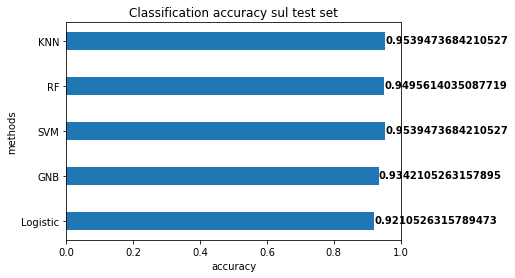

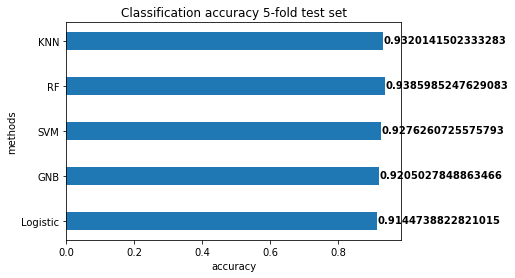

In [45]:
### LDA DATA
classification_info(df_lda,cross_validation=True,verbose=True)

## Risultati classificazione

In generale l'accuracy è stata molto alta in entrambi i dataset, tuttavia i modelli sui dati "normali" hanno mostrato di ottenere una *recall* per le classi *Suspect* e *Patological* leggermente più alta rispetto ai modelli sui dati lda.

L'accuracy alta è dovuta al fatto che il dataset è sbilanciato.


## Classification dataset balancing

Cerchiamo di migliorare le prestazioni dei classificatori bilanciando il dataset.


### Undersampling
Cerco di ottenere un dataset più piccolo scartando dalle classi più numerose un numero di record sino ad arrivare alla numerosità della classe più piccola.

In [46]:
def undersampling_df(df_nuovo):
    min_value=df_nuovo['fetal_health'].value_counts().min()
    normal_class_under = (df_nuovo[df_nuovo.fetal_health==1].sample(n=min_value, random_state=42).copy())
    suspect_class_under = (df_nuovo[df_nuovo.fetal_health==2].sample(n=min_value, random_state=42).copy())
    df_under=pd.concat([normal_class_under,suspect_class_under,df_nuovo[df_nuovo['fetal_health']==3]])
    df_under.shape
    return df_under
df_nuovo_under=undersampling_df(df_nuovo)

Text(0.5, 1.0, 'Dataset bilanciato (under)')

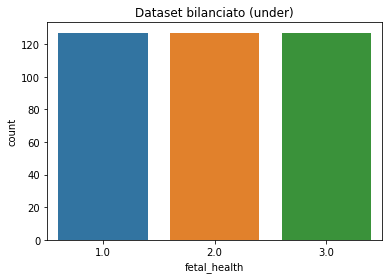

In [47]:
sns.countplot(df_nuovo_under.fetal_health)
plt.title('Dataset bilanciato (under)')

LOGISTIC

Confusion Matrix:
[[36  3  3]
 [ 2 22  2]
 [ 0  3 25]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.86      0.90        42
         2.0       0.79      0.85      0.81        26
         3.0       0.83      0.89      0.86        28

    accuracy                           0.86        96
   macro avg       0.86      0.87      0.86        96
weighted avg       0.87      0.86      0.87        96

Accuracy 0.8645833333333334 

Cross_val_score:  0.8798017771701983 

GNB

Confusion Matrix:
[[38  2  2]
 [ 3 23  0]
 [ 2  6 20]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.88      0.90      0.89        42
         2.0       0.74      0.88      0.81        26
         3.0       0.91      0.71      0.80        28

    accuracy                           0.84        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.85      0.84      0.84        96

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  71 out of  80 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:    0.7s finished


BEST SVM: SVC(C=1, gamma=1, probability=True)
SVM

Confusion Matrix:
[[37  3  2]
 [ 3 23  0]
 [ 0  2 26]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.88      0.90        42
         2.0       0.82      0.88      0.85        26
         3.0       0.93      0.93      0.93        28

    accuracy                           0.90        96
   macro avg       0.89      0.90      0.89        96
weighted avg       0.90      0.90      0.90        96

Accuracy 0.8958333333333334 

Cross_val_score:  0.903315105946685 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  65 tasks      | elapsed:    6.3s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   12.9s finished


BEST RF: RandomForestClassifier(n_estimators=25)
RF


Confusion Matrix:
[[38  2  2]
 [ 3 23  0]
 [ 0  2 26]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.92        42
         2.0       0.85      0.88      0.87        26
         3.0       0.93      0.93      0.93        28

    accuracy                           0.91        96
   macro avg       0.90      0.91      0.90        96
weighted avg       0.91      0.91      0.91        96

Accuracy
0.90625
Cross_val_score:  0.8901572112098428 

BEST KNN: KNeighborsClassifier(n_neighbors=4)
KNN

Confusion Matrix:
[[36  3  3]
 [ 2 23  1]
 [ 0  2 26]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.86      0.90        42
         2.0       0.82      0.88      0.85        26
         3.0       0.87      0.93      0.90        28

    accuracy                           0.89        96
   macro avg       0.88      0

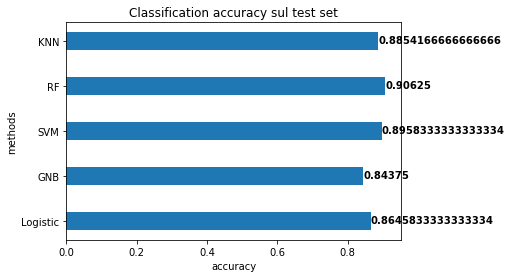

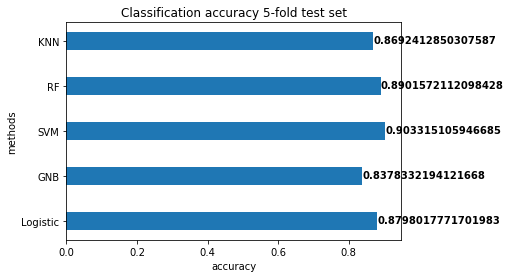

In [48]:
classification_info(df_nuovo_under,True,True)

LOGISTIC

Confusion Matrix:
[[38  2  2]
 [ 2 24  0]
 [ 1  5 22]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.90      0.92        42
         2.0       0.77      0.92      0.84        26
         3.0       0.92      0.79      0.85        28

    accuracy                           0.88        96
   macro avg       0.87      0.87      0.87        96
weighted avg       0.88      0.88      0.88        96

Accuracy 0.875 

Cross_val_score:  0.8535885167464115 

GNB

Confusion Matrix:
[[40  1  1]
 [ 5 21  0]
 [ 0  4 24]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.89      0.95      0.92        42
         2.0       0.81      0.81      0.81        26
         3.0       0.96      0.86      0.91        28

    accuracy                           0.89        96
   macro avg       0.89      0.87      0.88        96
weighted avg       0.89      0.89      0.89        96

Accuracy 0.

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


BEST SVM: SVC(C=10, gamma=10, probability=True)
SVM

Confusion Matrix:
[[39  1  2]
 [ 3 23  0]
 [ 0  2 26]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93        42
         2.0       0.88      0.88      0.88        26
         3.0       0.93      0.93      0.93        28

    accuracy                           0.92        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.92      0.92      0.92        96

Accuracy 0.9166666666666666 

Cross_val_score:  0.8717361585782639 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done  65 tasks      | elapsed:    5.8s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   12.1s finished


BEST RF: RandomForestClassifier(max_depth=5, n_estimators=200)
RF


Confusion Matrix:
[[38  2  2]
 [ 4 22  0]
 [ 1  1 26]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.88      0.90      0.89        42
         2.0       0.88      0.85      0.86        26
         3.0       0.93      0.93      0.93        28

    accuracy                           0.90        96
   macro avg       0.90      0.89      0.90        96
weighted avg       0.90      0.90      0.90        96

Accuracy
0.8958333333333334
Cross_val_score:  0.8950444292549555 

BEST KNN: KNeighborsClassifier(n_neighbors=7)
KNN

Confusion Matrix:
[[37  2  3]
 [ 3 23  0]
 [ 0  1 27]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.88      0.90        42
         2.0       0.88      0.88      0.88        26
         3.0       0.90      0.96      0.93        28

    accuracy                           0.91        96
   ma

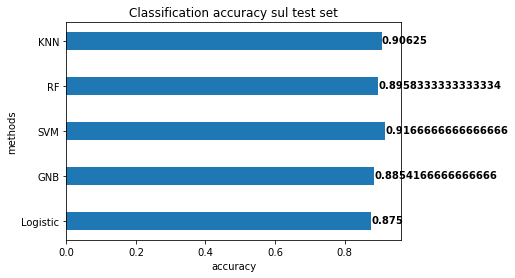

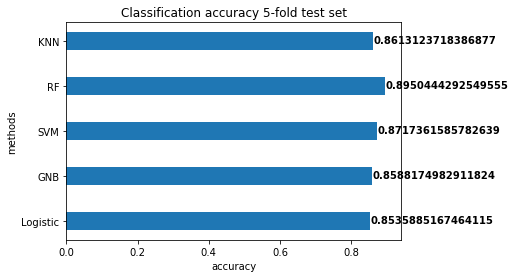

In [49]:
classification_info(undersampling_df(df_lda),True,True)

In [50]:
#classification_info(undersampling_df(df_pca),True,True)

## Analisi Risultati Undersampling

Nonostante adesso il dataset sia bilanciato le prestazioni dei classificatori  (accuracy) sono scese leggermente ed inoltre notiamo che adesso le *recall* per la classi sono tutte molto alte rispetto al caso precedente.

## Oversampling

Strategia del tutto opposta all'undersampling, in questo caso replico i record delle classi meno numerose fino ad arrivare al numero di campioni della classe maggioritaria.


In [51]:
def oversampling_df(df_nuovo):
    max_value=df_nuovo['fetal_health'].value_counts().max()
    suspect_class_over = (df_nuovo[df_nuovo.fetal_health==2].sample(n=max_value, random_state=42,replace=True).copy())
    patological_class_over = (df_nuovo[df_nuovo.fetal_health==3].sample(n=max_value, random_state=42,replace=True).copy())
    df_over=pd.concat([df_nuovo[df_nuovo['fetal_health']==1],suspect_class_over,patological_class_over])
    return df_over
df_nuovo_over=oversampling_df(df_nuovo)

Text(0.5, 1.0, 'Dataset bilanciato (over)')

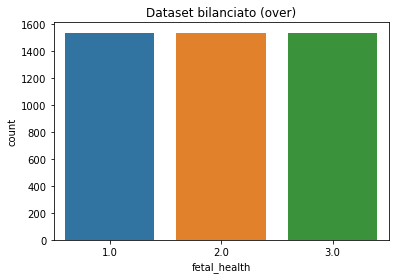

In [52]:
sns.countplot(df_nuovo_over.fetal_health)
plt.title('Dataset bilanciato (over)')

E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC

Confusion Matrix:
[[372  25   7]
 [  3 354  15]
 [  0  21 355]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.96       404
         2.0       0.89      0.95      0.92       372
         3.0       0.94      0.94      0.94       376

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152

Accuracy 0.9383680555555556 



E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\C

Cross_val_score:  0.925987031920882 

GNB

Confusion Matrix:
[[345  53   6]
 [ 16 354   2]
 [  3  90 283]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.85      0.90       404
         2.0       0.71      0.95      0.81       372
         3.0       0.97      0.75      0.85       376

    accuracy                           0.85      1152
   macro avg       0.88      0.85      0.85      1152
weighted avg       0.88      0.85      0.86      1152

Accuracy 0.8524305555555556 

Cross_val_score:  0.842664886087696 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   11.6s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   20.3s finished


BEST SVM: SVC(C=50, gamma=10, probability=True)
SVM

Confusion Matrix:
[[401   3   0]
 [  0 372   0]
 [  0   0 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.99      1.00       404
         2.0       0.99      1.00      1.00       372
         3.0       1.00      1.00      1.00       376

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152

Accuracy 0.9973958333333334 

Cross_val_score:  0.9863248708726957 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   24.2s finished


BEST RF: RandomForestClassifier(n_estimators=50)
RF


Confusion Matrix:
[[397   6   1]
 [  0 372   0]
 [  0   0 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       404
         2.0       0.98      1.00      0.99       372
         3.0       1.00      1.00      1.00       376

    accuracy                           0.99      1152
   macro avg       0.99      0.99      0.99      1152
weighted avg       0.99      0.99      0.99      1152

Accuracy
0.9939236111111112
Cross_val_score:  0.981763668181101 

BEST KNN: KNeighborsClassifier(n_neighbors=1)
KNN

Confusion Matrix:
[[396   7   1]
 [  0 372   0]
 [  0   0 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       404
         2.0       0.98      1.00      0.99       372
         3.0       1.00      1.00      1.00       376

    accuracy                           0.99      1152
  

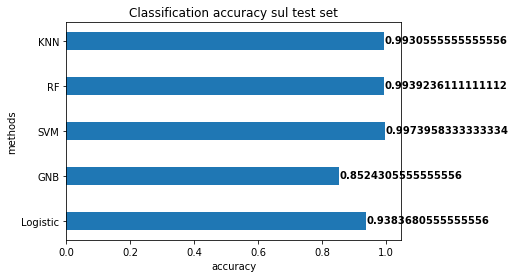

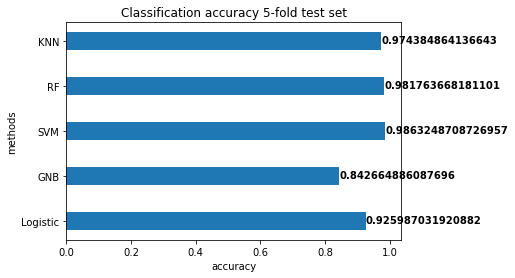

In [53]:
classification_info(df_nuovo_over,True,True)

LOGISTIC

Confusion Matrix:
[[366  30   8]
 [  7 362   3]
 [ 28  33 315]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.91      0.91      0.91       404
         2.0       0.85      0.97      0.91       372
         3.0       0.97      0.84      0.90       376

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152

Accuracy 0.9053819444444444 

Cross_val_score:  0.8958309486293545 

GNB

Confusion Matrix:
[[368  28   8]
 [ 12 358   2]
 [ 18  32 326]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.92      0.91      0.92       404
         2.0       0.86      0.96      0.91       372
         3.0       0.97      0.87      0.92       376

    accuracy                           0.91      1152
   macro avg       0.92      0.91      0.91      1152
weighted avg       0.92      0.91  

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   12.4s finished


BEST SVM: SVC(C=100, gamma=10, probability=True)
SVM

Confusion Matrix:
[[361  36   7]
 [  4 361   7]
 [  3  11 362]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.89      0.94       404
         2.0       0.88      0.97      0.93       372
         3.0       0.96      0.96      0.96       376

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152

Accuracy 0.9409722222222222 

Cross_val_score:  0.9355418636255507 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   19.1s finished


BEST RF: RandomForestClassifier(max_depth=15, n_estimators=200)
RF


Confusion Matrix:
[[387  16   1]
 [  0 372   0]
 [  0   0 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       404
         2.0       0.96      1.00      0.98       372
         3.0       1.00      1.00      1.00       376

    accuracy                           0.99      1152
   macro avg       0.99      0.99      0.99      1152
weighted avg       0.99      0.99      0.99      1152

Accuracy
0.9852430555555556
Cross_val_score:  0.9789479510387888 

BEST KNN: KNeighborsClassifier(n_neighbors=1)
KNN

Confusion Matrix:
[[390  14   0]
 [  0 372   0]
 [  0   0 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98       404
         2.0       0.96      1.00      0.98       372
         3.0       1.00      1.00      1.00       376

    accuracy                           0

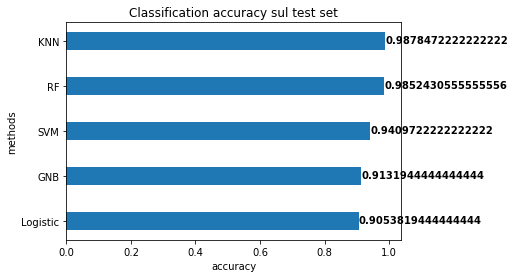

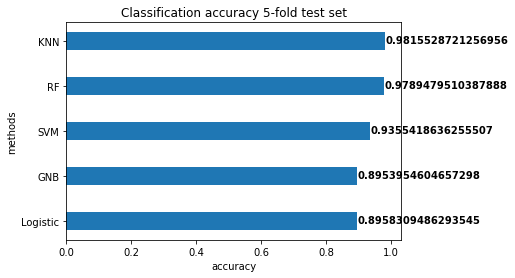

In [54]:
classification_info(oversampling_df(df_lda),True,True)

In [55]:
#classification_info(oversampling_df(df_pca),True,True)

Le prestazioni per alcuni modelli sono peggiorate come nell'undersampling, mentre per i modelli *RF*,*SVM*,*KNN* sono stati ottenuti dei buonissimi (quasi perfetti) risultati in termini di accuracy, recall e precision. Tuttavia potrebbe essere anche un caso di overfitting che si è ottenuto perché i dati sono stati replicati.

Cerchiamo adesso di smorzarlo con dei dati sintetici utilizzando *SMOTE*

## Proviamo con SMOTE

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter

E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LOGISTIC

Confusion Matrix:
[[367  20   9]
 [  7 367   3]
 [  0  29 350]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.98      0.93      0.95       396
         2.0       0.88      0.97      0.93       377
         3.0       0.97      0.92      0.94       379

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152

Accuracy 0.9409722222222222 



E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Conda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\C

Cross_val_score:  0.9314170912028565 

GNB

Confusion Matrix:
[[348  36  12]
 [ 22 354   1]
 [  1 108 270]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.88      0.91       396
         2.0       0.71      0.94      0.81       377
         3.0       0.95      0.71      0.82       379

    accuracy                           0.84      1152
   macro avg       0.87      0.84      0.84      1152
weighted avg       0.87      0.84      0.85      1152

Accuracy 0.84375 

Cross_val_score:  0.8422331663451732 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   11.2s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   20.9s finished


BEST SVM: SVC(C=50, gamma=10, probability=True)
SVM

Confusion Matrix:
[[391   5   0]
 [  0 377   0]
 [  0   0 379]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.99      0.99       396
         2.0       0.99      1.00      0.99       377
         3.0       1.00      1.00      1.00       379

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152

Accuracy 0.9956597222222222 

Cross_val_score:  0.9845883353235308 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:   10.3s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   28.8s finished


BEST RF: RandomForestClassifier(n_estimators=25)
RF


Confusion Matrix:
[[389   5   2]
 [  3 374   0]
 [  0   3 376]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99       396
         2.0       0.98      0.99      0.99       377
         3.0       0.99      0.99      0.99       379

    accuracy                           0.99      1152
   macro avg       0.99      0.99      0.99      1152
weighted avg       0.99      0.99      0.99      1152

Accuracy
0.9887152777777778
Cross_val_score:  0.9741674733443088 

BEST KNN: KNeighborsClassifier(n_neighbors=1)
KNN

Confusion Matrix:
[[388   6   2]
 [  0 377   0]
 [  0   1 378]]

Classification Report
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       396
         2.0       0.98      1.00      0.99       377
         3.0       0.99      1.00      1.00       379

    accuracy                           0.99      1152
 

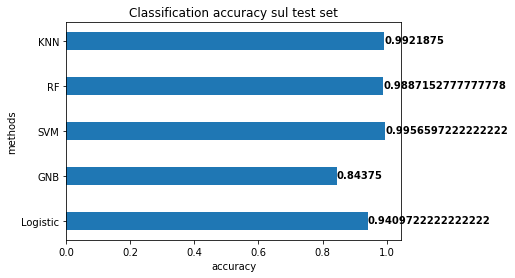

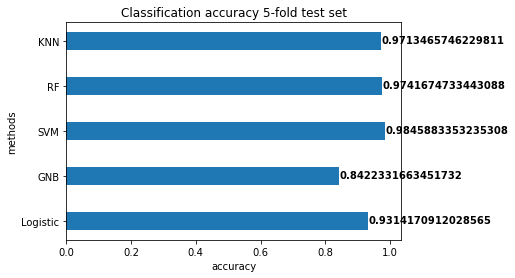

In [57]:
def smote_df(df_nuovo):
    X_resampled, y_resampled = SMOTE(k_neighbors=5, random_state=42).fit_resample(df_nuovo.drop('fetal_health', axis=1), df_nuovo.fetal_health)
    df_smote=pd.DataFrame(X_resampled,columns=df_nuovo.drop('fetal_health',axis=1).columns)
    df_smote['fetal_health']=y_resampled
    #print(df_smote.shape)
    return df_smote


classification_info(smote_df(df_nuovo),True,True) ##lda e pca

LOGISTIC

Confusion Matrix:
[[362  25   9]
 [ 19 357   1]
 [ 26  40 313]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90       396
         2.0       0.85      0.95      0.89       377
         3.0       0.97      0.83      0.89       379

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152

Accuracy 0.8958333333333334 

Cross_val_score:  0.8986492565611744 

GNB

Confusion Matrix:
[[366  20  10]
 [ 24 352   1]
 [ 18  63 298]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.90      0.92      0.91       396
         2.0       0.81      0.93      0.87       377
         3.0       0.96      0.79      0.87       379

    accuracy                           0.88      1152
   macro avg       0.89      0.88      0.88      1152
weighted avg       0.89      0.88  

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.7s
[Parallel(n_jobs=5)]: Done  80 out of  80 | elapsed:   11.2s finished


BEST SVM: SVC(C=100, gamma=10, probability=True)
SVM

Confusion Matrix:
[[358  27  11]
 [ 14 362   1]
 [  0  13 366]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.96      0.90      0.93       396
         2.0       0.90      0.96      0.93       377
         3.0       0.97      0.97      0.97       379

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152

Accuracy 0.9427083333333334 

Cross_val_score:  0.9377124741804274 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  55 tasks      | elapsed:    7.6s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   21.2s finished


BEST RF: RandomForestClassifier(max_depth=15)
RF


Confusion Matrix:
[[372  15   9]
 [ 11 365   1]
 [  2  11 366]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95       396
         2.0       0.93      0.97      0.95       377
         3.0       0.97      0.97      0.97       379

    accuracy                           0.96      1152
   macro avg       0.96      0.96      0.96      1152
weighted avg       0.96      0.96      0.96      1152

Accuracy
0.9574652777777778
Cross_val_score:  0.9561588954757749 

BEST KNN: KNeighborsClassifier()
KNN

Confusion Matrix:
[[362  23  11]
 [  4 373   0]
 [  1  11 367]]

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.91      0.95       396
         2.0       0.92      0.99      0.95       377
         3.0       0.97      0.97      0.97       379

    accuracy                           0.96      1152
   macro avg     

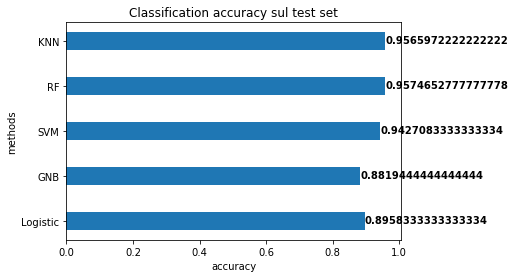

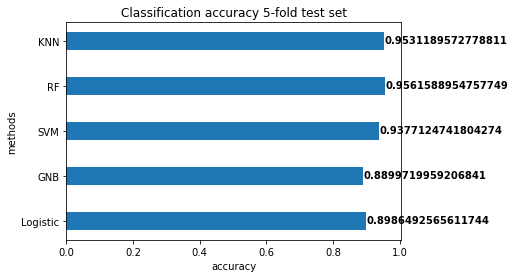

In [58]:
classification_info(smote_df(df_lda),True,True)

In [59]:
#classification_info(smote_df(df_pca),True,True)

## Analisi risultati SMOTE 

I risultati di *SMOTE* seguono quelli ottenuti con l'oversampling, in particolare sui dati normali e pca abbiamo ottenuto dei buonissimi risultati con circa il $99\%$ di accuracy che è il miglior risultato raggiunto fino ad adesso.

## Clustering

Consideriamo il nostro dataset senza etichette, proviamo a vedere se attraverso il clustering riusciamo a ricostruire i gruppi di record originali.
Verrano utilizzati due algoritmi per il clustering:
<li>K-Means</li>
<li>GMM</li>
<li>Agglomerative Clustering</li>




Numero ottimale di cluster per normal è: 2  silhoutte :  0.21264930069374377
Numero ottimale di cluster per lda è: 3  silhoutte :  0.5743121827881051
Numero ottimale di cluster per pca è: 9  silhoutte :  0.17769904914750392


Text(0.5, 1.0, 'LDA df clustering')

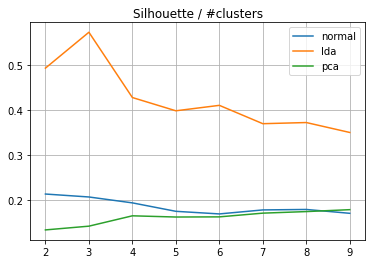

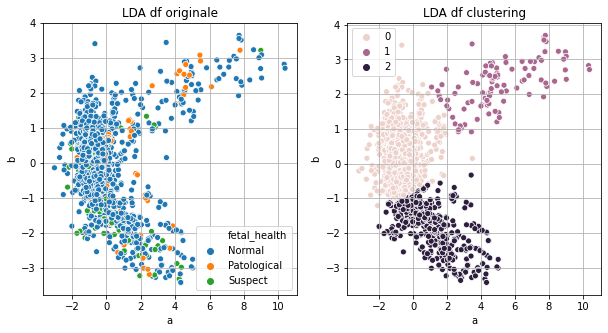

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def cluster_info(df,label_):
    mmscaler=MinMaxScaler()
    df_scaled=pd.DataFrame(mmscaler.fit_transform(df),columns=df.columns)
    silhouette=[]
    n_cluster=10
    for n in range(2,n_cluster):
        kmeans = KMeans(n_clusters=n, random_state=30)
        c_labels = kmeans.fit_predict(df_scaled.drop(['fetal_health'],axis=1))
        silhouette.append(silhouette_score(df_scaled.drop(['fetal_health'],axis=1), c_labels))

    plt.plot(range(2,n_cluster),silhouette,label=label_)
    plt.title('Silhouette / #clusters')
    plt.grid()
    plt.legend()
    print(f"Numero ottimale di cluster per {label_} è:",np.argmax(silhouette)+2," silhoutte : ",max(silhouette))
    
    kmeans = KMeans(n_clusters=np.argmax(silhouette)+2, random_state=30)
    c_labels = kmeans.fit_predict(df_scaled.drop(['fetal_health'],axis=1))
        
    return c_labels
    
labels_norm=cluster_info(df_nuovo,'normal') ##df_NUOVO
labels_lda=cluster_info(df_lda,'lda')  #df_LDA
labels_pca=cluster_info(df_pca,'pca')  #df_PCA

fig,axes=plt.subplots(1,2,figsize=(10,5))   
sns.scatterplot(df_lda['a'],df_lda['b'],hue=fetal_health,ax=axes[0])
sns.scatterplot(df_lda['a'],df_lda['b'],hue=labels_lda,ax=axes[1])

#axes[0].scatter(df_lda['a'],df_lda['b'],c=df_lda['fetal_health'])
#axes[0].legend()
axes[0].set_title('LDA df originale')
axes[0].grid()
#axes[1].scatter(df_lda['a'],df_lda['b'],c=labels_lda)
axes[1].grid()
axes[1].set_title('LDA df clustering')


## Analisi risultati Clustering K-Means

L'algoritmo ha identificato come numero di cluster ottimale 3 per i dati lda, per i dati originali, 7 per i dati pca.
Solamente per i dati lda è riuscito a trovare lo stesso numeri di classi, ma come si vede dagli ultimi 2 plot, i *label* ottenuti non corrispondono a quelli del dataset originale.



## Gaussian of Mixture

Prendiamo in considerazione solo i dati lda poichè possiamo confrontarli molto semplicemente.

Text(0.5, 1.0, 'df lda GMM')

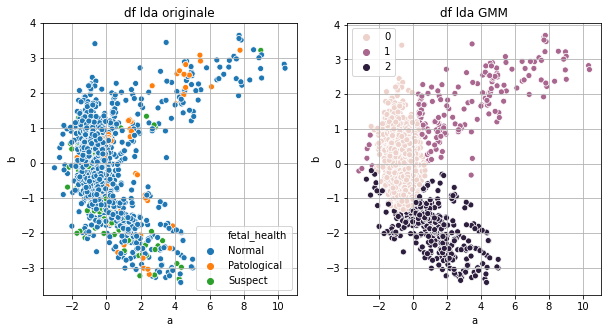

In [61]:
from sklearn.mixture import GaussianMixture as GMM

gmm=GMM(n_components=3) ## 3 cluster
gmm.fit(df_lda.drop(['fetal_health'],axis=1))
labels_gmm = gmm.predict(df_lda.drop(['fetal_health'],axis=1))
#labels=cluster_info(df_lda)    
fig,axes=plt.subplots(1,2,figsize=(10,5))   
sns.scatterplot(df_lda['a'],df_lda['b'],hue=fetal_health,ax=axes[0])
sns.scatterplot(df_lda['a'],df_lda['b'],hue=labels_gmm,ax=axes[1])
axes[0].grid()
axes[0].set_title('df lda originale')
axes[1].grid()
axes[1].set_title('df lda GMM')

Neanche l'algoritmo GMM ricostruisce il dataset originale 

'\nlabel_=\'lda\'\nplt.figure()\nsilhouette=[]\nn_cluster=10\nfor n in range(2,n_cluster):\n    kmeans = AgglomerativeClustering(n_clusters=n, linkage=\'ward\')\n    c_labels = kmeans.fit_predict(df_lda.drop([\'fetal_health\'],axis=1))\n    #c_labels=ward.labels_\n    silhouette.append(silhouette_score(df_lda.drop([\'fetal_health\'],axis=1), c_labels)) ### veere funzione\n    \n#print(silhouette)\nplt.plot(range(2,n_cluster),silhouette,label=label_)\nplt.title(\'Silhouette / #clusters\')\nplt.grid()\nplt.legend()\nprint(f"Numero ottimale di cluster per {label_} è:",np.argmax(silhouette)+2," silhoutte : ",max(silhouette))\n'

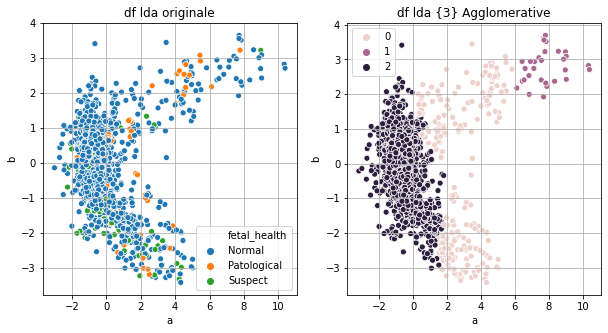

In [66]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3, linkage='complete')
ward.fit(df_lda.drop(['fetal_health'],axis=1))
label_ward=ward.labels_
fig,axes=plt.subplots(1,2,figsize=(10,5))   
sns.scatterplot(df_lda['a'],df_lda['b'],hue=fetal_health,ax=axes[0])
sns.scatterplot(df_lda['a'],df_lda['b'],hue=label_ward,ax=axes[1])
axes[0].grid()
axes[0].set_title('df lda originale')
axes[1].grid()
axes[1].set_title('df lda {3} Agglomerative')



## Conclusioni Clustering

Gli algoritmi presentati hanno dimostrato di non sapere ricostruire il dataset originario. 
In effetti ciò si poteva intuire guardando lo scatter plot per i dati LDA, KMeans,GMM utilizzano metriche euclidee ma i dati sono più complessi di ciò, non si ottengono risultati migliori neanche  con l'Agglomerative Clustering.

Interessante notare che il Kmeans sui dati LDA ha però trovare il numero di cluster ottimali pari a 3, come nel dataset originario.
